<a href="https://colab.research.google.com/github/meeshu/disruptions/blob/main/Small_multiples_disruptionsbygoalcategories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
# @title
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [124]:
# @title
!pwd
from google.colab.data_table import DataTable
DataTable.max_columns = 30

/content


In [125]:
# @title
##from google.colab import drive
#drive.mount('/content/drive')

### **data cleaning**

In [126]:
# @title
#importing data from github. switched from google drive.
#url= 'https://raw.githubusercontent.com/meeshu/disruptions/refs/heads/main/data/Survey%20data%20-%20all-participants-coding-alpha.csv' # Changed url to raw data url
# using beta coding data file
url = 'https://raw.githubusercontent.com/meeshu/disruptions/refs/heads/main/data/Survey%20data%20-%20all-participants-coding-beta.csv'

df=pd.read_csv(url)
df.head()

,pid,old-pid,gid,unique gid,goaldisrupted,old-cid,goal-statement,Goal categories,Unnamed: 8,cid,...,Disruption labor produced.2,affect-goal,change,Goal changes,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,S01,S01,goal1,S01goal1,"S01goal2, S01goal4",circ1,Financial independence,Financial Stability/Safety,NaN,circ1,...,NaN,I live far away from opportunities/ There are ...,I have shifted to trying to find work online,Changed strategy,NaN,NaN,NaN,NaN,NaN,NaN
1,S01,S01,goal1,S01goal1,NaN,circ2,Financial independence,Financial Stability/Safety,NaN,circ2,...,NaN,I feel things are hopeless,"If I were more motivated, I could be more fina...",Abandoned,NaN,NaN,NaN,NaN,NaN,NaN
2,S01,S01,goal1,S01goal1,NaN,circ3,Financial independence,Financial Stability/Safety,NaN,circ3,...,NaN,I cannot stand or walk much,"I have to work more from home, but my level of...",Changed strategy,NaN,NaN,NaN,NaN,NaN,NaN
3,S01,S01,goal2,S01goal2,NaN,circ1,Quell fears,Mental health and wellbeing,NaN,circ1,...,NaN,I am fearful of the enemy (his father),I made an appt with a dr despite wanting to ha...,Changed strategy,NaN,NaN,NaN,NaN,NaN,NaN
4,S01,S01,goal2,S01goal2,NaN,circ2,Quell fears,Mental health and wellbeing,NaN,circ2,...,NaN,Fearful I won't be able to sell home if I tried,I have to trust the universe/God,No change,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
# @title
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.rstrip()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df = df.drop(columns=['old-pid'])
df = df.drop(columns=['old-cid'])
df['disruption_labor_aggregated'] = df[['disruption_labor_produced',
                                                          'disruption_labor_produced.1',
                                                          'disruption_labor_produced.2']].apply(
    lambda row: ', '.join(row.dropna().astype(str)), axis=1)


In [128]:
# @title
df['pid*gid'] = df['pid'] + "*" + df['gid']

In [129]:
# @title
df['how-long'] = df['how-long'].apply(
    lambda x: "No disruption" if isinstance(x, str) and "no disruption" in x else x
)
df['disruption_status'] = df.apply(
    lambda x: 'No Disruption' if (x['situation_that_occurred'] == "No disruption")
    #or(x['disruption_labor_aggregated'] in ["No labor- positive disruption"])
    or (x['how-long'] in ["No disruption"])
    else 'Disruption', axis=1)

df

,pid,gid,unique_gid,goaldisrupted,goal-statement,goal_categories,cid,uniquecid,goal_scope,rep-id,...,affect-logistical,disruption_labor_produced,disruption_labor_produced.1,disruption_labor_produced.2,affect-goal,change,goal_changes,disruption_labor_aggregated,pid*gid,disruption_status
0,S01,goal1,S01goal1,"S01goal2, S01goal4",Financial independence,Financial Stability/Safety,circ1,S01goal1circ1,Long term,NaN,...,NaN,Logistical,NaN,NaN,I live far away from opportunities/ There are ...,I have shifted to trying to find work online,Changed strategy,Logistical,S01*goal1,Disruption
1,S01,goal1,S01goal1,NaN,Financial independence,Financial Stability/Safety,circ2,S01goal1circ2,Long term,NaN,...,NaN,Emotional,NaN,NaN,I feel things are hopeless,"If I were more motivated, I could be more fina...",Abandoned,Emotional,S01*goal1,Disruption
2,S01,goal1,S01goal1,NaN,Financial independence,Financial Stability/Safety,circ3,S01goal1circ3,Long term,NaN,...,NaN,Physical,NaN,NaN,I cannot stand or walk much,"I have to work more from home, but my level of...",Changed strategy,Physical,S01*goal1,Disruption
3,S01,goal2,S01goal2,NaN,Quell fears,Mental health and wellbeing,circ1,S01goal2circ1,Aspirational,r1,...,NaN,Emotional,NaN,NaN,I am fearful of the enemy (his father),I made an appt with a dr despite wanting to ha...,Changed strategy,Emotional,S01*goal2,Disruption
4,S01,goal2,S01goal2,NaN,Quell fears,Mental health and wellbeing,circ2,S01goal2circ2,Aspirational,r2,...,NaN,Emotional,NaN,NaN,Fearful I won't be able to sell home if I tried,I have to trust the universe/God,No change,Emotional,S01*goal2,Disruption
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,S149,goal1,S149goal1,NaN,Save money for a newer car,Shopping,circ2,S149goal1circ2,Long term,NaN,...,"none, I had no choice. I tried looking for che...",Emotional,Financial,Logistical,"Well, instead of spending $45 on pads and $60-...",Instead of putting away $200 from my paycheck ...,Skipped,"Emotional, Financial, Logistical",S149*goal1,Disruption
758,S149,goal1,S149goal1,NaN,Save money for a newer car,Shopping,circ3,S149goal1circ3,Long term,NaN,...,na,Emotional,NaN,NaN,Instead of paying $32.99 I had to spend $55.99...,I had to be realistic and had to add more time...,Changed time,Emotional,S149*goal1,Disruption
759,S149,goal1,S149goal1,NaN,Save money for a newer car,Shopping,circ4,S149goal1circ4,Long term,NaN,...,na,Emotional,NaN,NaN,"Well, instead of paying a fair price withing m...",I had to call around and ask everyone if they ...,Changed time,Emotional,S149*goal1,Disruption
760,S149,goal2,S149goal2,NaN,workout 3-4 times a week,Physical Activity,circ1,S149goal2circ1,Medium term,NaN,...,I had to mostly work out my arms and core and ...,Physical,Emotional,NaN,it's hard to put weight on my leg when it's al...,I twisted my knee and was unable to walk strai...,Changed strategy,"Physical, Emotional",S149*goal2,Disruption


### **#goals for each goal type**

**How many goals were reported under each type of goal category?**


* goal categories with count of goals- per participant per goal statement (Number of goals (gid) under each goal category)
  * **DONE** - Table
  * **DONE** - Bar chart   
* **YES** - unique Identifier for each goal: gid*pid
* **TRUE** - Validation- sum of all goals should be 433


In [130]:
# @title
# Number of goals (gid) under each goal category

# Identifier: gid*pid

df_goalcategories = df[['pid', 'gid', 'pid*gid', 'goal-statement', 'goal_categories', 'goal_scope']]

goals_each_category = df_goalcategories.drop_duplicates(subset = 'pid*gid')

pivot_table = goals_each_category.pivot_table(index='goal_categories', aggfunc='size', fill_value=0)

goals_each_category = pivot_table.reset_index()

goals_each_category.rename(columns={0: 'count of goals'}, inplace=True)

goals_each_category.sort_values(by='count of goals', ascending=False, inplace=True)

goals_each_category_graph = goals_each_category

# Calculate the total count
total_count = goals_each_category['count of goals'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'goal_categories': ['Total'], 'count of goals': [total_count]})

# Concatenate the original DataFrame and the total row
goals_each_category = pd.concat([goals_each_category, total_row], ignore_index=True)

In [131]:
# @title
goals_each_category

,goal_categories,count of goals
0,Mental health and wellbeing,63
1,Physical Activity,58
2,Financial Stability/Safety,53
3,Weight management,38
4,Nutrition,38
5,Work/Career,35
6,Social connection,32
7,Health - other,24
8,Housing,22
9,Education/Learning,17


same as above but combining some goal categories

In [132]:
# @title
# Number of goals (gid) under each goal category

# Identifier: gid*pid

df_goalcategories = df[['pid', 'gid', 'pid*gid', 'goal-statement', 'goal_categories', 'goal_scope']]
df_goalcategories_combined = df[['pid', 'gid', 'pid*gid', 'goal-statement', 'goal_categories', 'goal_scope']]

#creating new dataframe for combined categories
df_goalcategories_combined['goal_categories'] = df_goalcategories['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})

goals_each_category = df_goalcategories_combined.drop_duplicates(subset = 'pid*gid')

pivot_table = goals_each_category.pivot_table(index='goal_categories', aggfunc='size', fill_value=0)

goals_each_category = pivot_table.reset_index()

goals_each_category.rename(columns={0: 'count of goals'}, inplace=True)

goals_each_category.sort_values(by='count of goals', ascending=False, inplace=True)

goals_each_category_graph = goals_each_category

# Calculate the total count
total_count = goals_each_category['count of goals'].sum()

# Create a new DataFrame for the total row
#total_row = pd.DataFrame({'goal_categories': ['Total'], 'count of goals': [total_count]})

# Concatenate the original DataFrame and the total row
#goals_each_category = pd.concat([goals_each_category], ignore_index=True)

goals_each_category

<ipython-input-132-5ba91d137cde>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goalcategories_combined['goal_categories'] = df_goalcategories['goal_categories'].replace({


,goal_categories,count of goals
4,Mental health and wellbeing,63
7,Physical Activity,58
1,Financial Stability/Safety,53
13,Work/Education,52
5,Nutrition,38
12,Weight management,38
2,Health - other,33
11,Social connection,32
3,Housing,22
8,Recreation,16


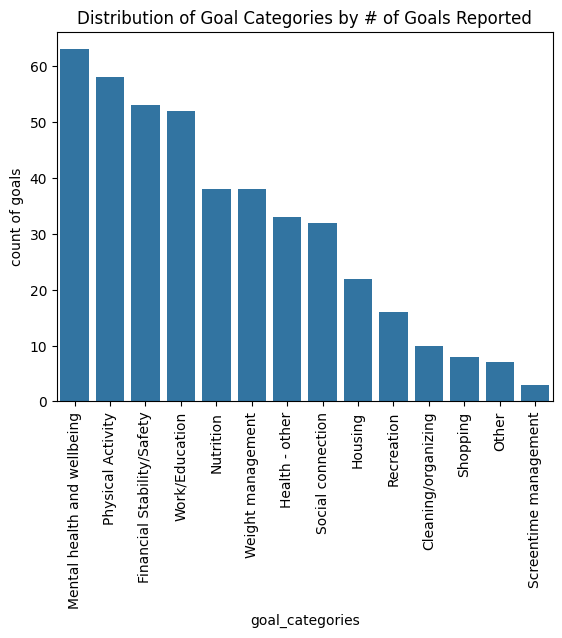

In [133]:
# @title
sns.barplot(x='goal_categories', y='count of goals', data=goals_each_category_graph)
plt.title('Distribution of Goal Categories by # of Goals Reported')
plt.xticks(rotation=90)


plt.show()

### for manuscript- goal categories combines

health: combining physical activity, mental health and well-being, weight management, nutrition, health-other

finances: financial stability/ safety, shopping, housing

Work/education:

social connection:

Recreation

cleaning/organizing

Other: other, screentime

In [166]:
# Number of goals (gid) under each goal category

# Identifier: gid*pid

df_goalcategories = df[['pid', 'gid', 'pid*gid', 'goal-statement', 'goal_categories']]
df_goalcategories_combined = df[['pid', 'gid', 'pid*gid', 'goal-statement', 'goal_categories']]

#creating new dataframe for combined categories
df_goalcategories_combined['goal_categories'] = df_goalcategories['goal_categories'].replace({
    'Manage chronic condition': 'Health',
    'Sleep': 'Health',
    'Physical Activity': 'Health',
    'Mental health and wellbeing': 'Health',
    'Weight management': 'Health',
    'Nutrition': 'Health',
    'Health - other': 'Health',
    'Financial Stability/Safety': 'Finances',
    'Shopping': 'Finances',
    'Housing': 'Finances',
    'Work/Career': 'Work/Education',
    'Education/Learning': 'Work/Education',
    'Screentime management': 'Other',
    'Cleaning/organizing' : 'Cleaning'
})

goals_each_category = df_goalcategories_combined.drop_duplicates(subset = 'pid*gid')

pivot_table = goals_each_category.pivot_table(index='goal_categories', aggfunc='size', fill_value=0)

goals_each_category = pivot_table.reset_index()

goals_each_category.rename(columns={0: 'count of goals'}, inplace=True)

goals_each_category.sort_values(by='count of goals', ascending=False, inplace=True)

goals_each_category_graph = goals_each_category

# Calculate the total count
total_count = goals_each_category['count of goals'].sum()

# Create a new DataFrame for the total row
#total_row = pd.DataFrame({'goal_categories': ['Total'], 'count of goals': [total_count]})

# Concatenate the original DataFrame and the total row
#goals_each_category = pd.concat([goals_each_category], ignore_index=True)

goals_each_category

<ipython-input-166-5140b23da75a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goalcategories_combined['goal_categories'] = df_goalcategories['goal_categories'].replace({


,goal_categories,count of goals
2,Health,230
1,Finances,83
6,Work/Education,52
5,Social connection,32
4,Recreation,16
0,Cleaning,10
3,Other,10


## table of number of disruptions for each goal category

In [135]:
# @title
df['pid*gid*cid'] = df['pid'] + "*" + df['gid'] + "*" + df['cid']

len(df['pid*gid*cid'])
df['pid*gid*cid'].nunique()

disruptions_df = df[['pid', 'gid', 'pid*gid', 'pid*gid*cid', 'goal_categories', 'situation_that_occurred', 'disruption_status']]

disruptions_df

,pid,gid,pid*gid,pid*gid*cid,goal_categories,situation_that_occurred,disruption_status
0,S01,goal1,S01*goal1,S01*goal1*circ1,Financial Stability/Safety,Resources,Disruption
1,S01,goal1,S01*goal1,S01*goal1*circ2,Financial Stability/Safety,Internal - Feelings and thoughts,Disruption
2,S01,goal1,S01*goal1,S01*goal1*circ3,Financial Stability/Safety,Pain,Disruption
3,S01,goal2,S01*goal2,S01*goal2*circ1,Mental health and wellbeing,Caregiving,Disruption
4,S01,goal2,S01*goal2,S01*goal2*circ2,Mental health and wellbeing,Finances,Disruption
...,...,...,...,...,...,...,...
757,S149,goal1,S149*goal1,S149*goal1*circ2,Shopping,Finances,Disruption
758,S149,goal1,S149*goal1,S149*goal1*circ3,Shopping,Finances,Disruption
759,S149,goal1,S149*goal1,S149*goal1*circ4,Shopping,Social interaction - other,Disruption
760,S149,goal2,S149*goal2,S149*goal2*circ1,Physical Activity,Pain,Disruption


In [136]:
# @title
# filter out no disruptions

disruptions_df_filter = disruptions_df[disruptions_df['disruption_status'] == 'Disruption']


disruption_by_category = disruptions_df_filter.groupby('pid*gid*cid')['goal_categories'].unique()
disruption_by_category = disruptions_df_filter['goal_categories'].value_counts()
disruption_by_category = disruption_by_category.reset_index()
disruption_by_category

,goal_categories,count
0,Mental health and wellbeing,99
1,Physical Activity,92
2,Financial Stability/Safety,84
3,Weight management,81
4,Social connection,60
5,Work/Career,60
6,Nutrition,60
7,Health - other,41
8,Housing,37
9,Education/Learning,26


### goal categories combined- work and education goals and chronic condition and sleeping goals with other health goals

In [137]:
# @title
# filter out no disruptions
disruptions_df = disruptions_df[disruptions_df['disruption_status'] == 'Disruption']

#creating new dataframe for combined categories
disruptions_by_goal_type_combined = disruptions_df

#grouping [chronic and sleep] and [work and education]
disruptions_by_goal_type_combined['goal_categories'] = disruptions_by_goal_type_combined['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})



disruption_by_category = disruptions_by_goal_type_combined.groupby('pid*gid*cid')['goal_categories'].unique()
disruption_by_category = disruptions_by_goal_type_combined['goal_categories'].value_counts()
disruption_by_category = disruption_by_category.reset_index()
disruption_by_category

<ipython-input-137-07f26a3f5f1f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disruptions_by_goal_type_combined['goal_categories'] = disruptions_by_goal_type_combined['goal_categories'].replace({


,goal_categories,count
0,Mental health and wellbeing,99
1,Physical Activity,92
2,Work/Education,86
3,Financial Stability/Safety,84
4,Weight management,81
5,Social connection,60
6,Nutrition,60
7,Health - other,57
8,Housing,37
9,Recreation,23


### for manuscript- goal categories combines

health: combining physical activity, mental health and well-being, weight management, nutrition, health-other

finances: financial stability/ safety, shopping, housing

Work/education:

social connection:

Recreation

cleaning/organizing

Other: other, screentime

In [165]:
# @title
# filter out no disruptions
disruptions_df = disruptions_df[disruptions_df['disruption_status'] == 'Disruption']

#creating new dataframe for combined categories
disruptions_by_goal_type_combined = disruptions_df

#grouping [chronic and sleep] and [work and education]
disruptions_by_goal_type_combined['goal_categories'] = disruptions_by_goal_type_combined['goal_categories'].replace({
    'Manage chronic condition': 'Health',
    'Sleep': 'Health',
    'Physical Activity': 'Health',
    'Mental health and wellbeing': 'Health',
    'Weight management': 'Health',
    'Nutrition': 'Health',
    'Health - other': 'Health',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education',
    'Financial Stability/Safety': 'Finances',
    'Shopping': 'Finances',
    'Housing': 'Finances',
    'Screentime management': 'Other',
        'Cleaning/organizing' : 'Cleaning'

})



disruption_by_category = disruptions_by_goal_type_combined.groupby('pid*gid*cid')['goal_categories'].unique()
disruption_by_category = disruptions_by_goal_type_combined['goal_categories'].value_counts()
disruption_by_category = disruption_by_category.reset_index()
disruption_by_category

,goal_categories,count
0,Health,389
1,Finances,133
2,Work/Education,86
3,Social connection,60
4,Recreation,23
5,Other,17
6,Cleaning,15


## number of goals and disruptions for each category

In [196]:
# prompt: dataframe with goals_each_category and disruption_by_category

combined_df = pd.merge(goals_each_category, disruption_by_category, on='goal_categories', how='left')
combined_df = combined_df.rename(columns={'count of goals': 'number_of_goals', 'goal_categories': 'category', 'count': 'number_of_disruptions'})
combined_df = combined_df[['category', 'number_of_goals', 'number_of_disruptions']]
combined_df

,category,number_of_goals,number_of_disruptions
0,Health,230,389
1,Finances,83,133
2,Work/Education,52,86
3,Social connection,32,60
4,Recreation,16,23
5,Cleaning,10,15
6,Other,10,17


<ipython-input-197-7fb234fc1076>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
<ipython-input-197-7fb234fc1076>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


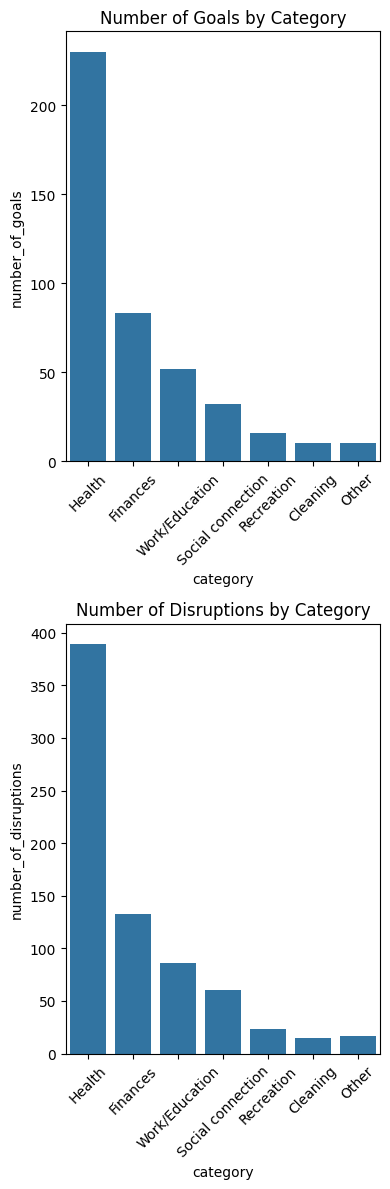

In [197]:
# prompt: plot as 2 small multiple bar chart

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(4, 12))

# Plot 1: Number of Goals
sns.barplot(ax=axes[0], x='category', y='number_of_goals', data=combined_df)
axes[0].set_title('Number of Goals by Category')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot 2: Number of Disruptions
sns.barplot(ax=axes[1], x='category', y='number_of_disruptions', data=combined_df)
axes[1].set_title('Number of Disruptions by Category')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

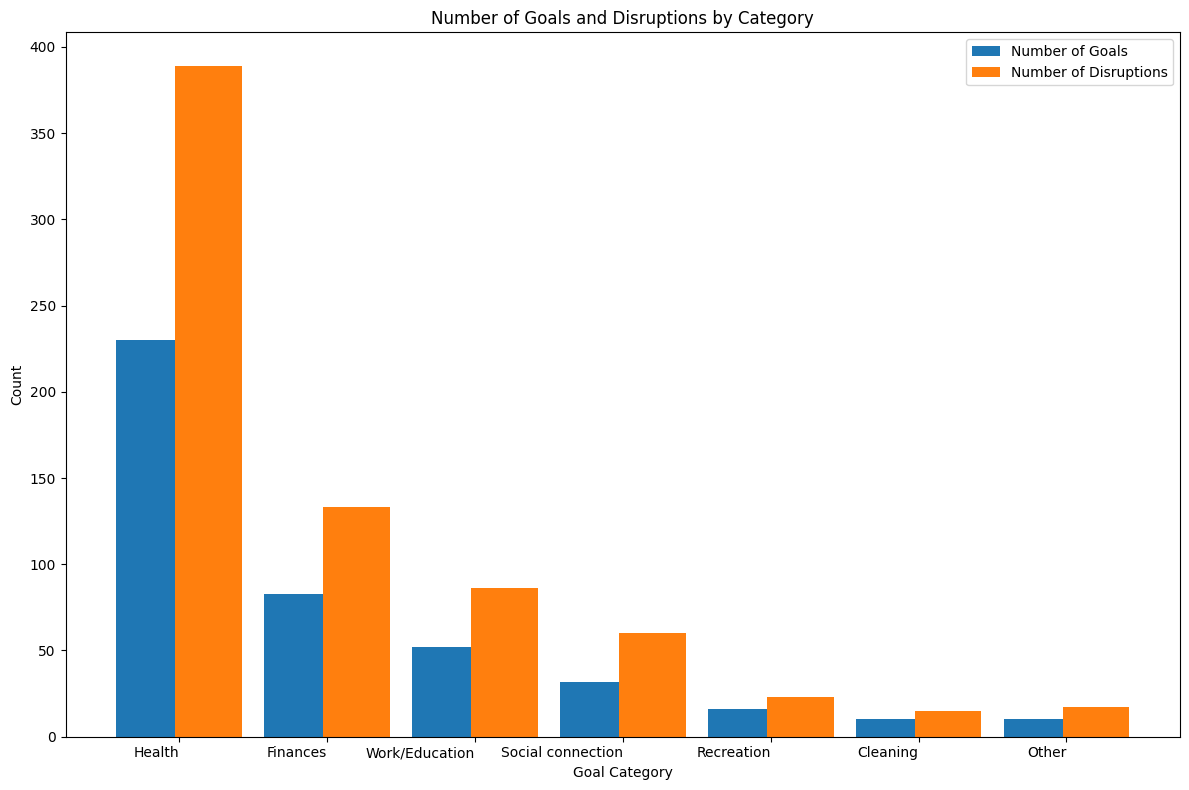

In [206]:
# prompt: plot combined_df using multiple bar chart or grouped bar chart using matplotlib

import matplotlib.pyplot as plt
import numpy as np


# Assuming combined_df is defined as in your code

fig, ax = plt.subplots(figsize=(12, 8))

width = 0.45  # the width of the bars

X_axis = np.arange(len(combined_df.category))

ax.bar(X_axis - 0.2, combined_df.number_of_goals, width, label='Number of Goals')
ax.bar(X_axis + 0.2, combined_df.number_of_disruptions, width, label='Number of Disruptions')

# Correctly set tick positions and labels together
tick_positions = range(len(combined_df.category)) # Manual indexing starting from 0
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels=combined_df.category, ha='right')

ax.set_xlabel("Goal Category")
ax.set_ylabel("Count")
ax.set_title("Number of Goals and Disruptions by Category")
ax.legend()
plt.tight_layout()
plt.show()

## number of disruptions of different durations for each goal category

filter out rows with
disruption = “no disruption”

OR "how-long" = no-disruption or no-response

include rows with disruption labor = no response because it is still a disruption

In [141]:
# @title

df['pid*gid*cid'] = df['pid'] + "*" + df['gid'] + "*" + df['cid']

len(df['pid*gid*cid'])
df['pid*gid*cid'].nunique()

disruptions_duration_goaltype = df[['pid', 'gid', 'pid*gid', 'pid*gid*cid', 'goal_categories','how-long', 'disruption_status']]


#filter out no disruptions
disruptions_duration_goaltype = disruptions_duration_goaltype[disruptions_duration_goaltype['disruption_status'] == 'Disruption']

#filter out no response
disruptions_duration_goaltype = disruptions_duration_goaltype[disruptions_duration_goaltype['how-long'] != 'No response']

#grouping [chronic and sleep] and [work and education]
disruptions_duration_goaltype['goal_categories'] = disruptions_duration_goaltype['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})


disruptions_duration_goaltype = disruptions_duration_goaltype[['pid*gid*cid', 'how-long', 'goal_categories']]
disruptions_duration_goaltype

,pid*gid*cid,how-long,goal_categories
0,S01*goal1*circ1,longer than a year,Financial Stability/Safety
1,S01*goal1*circ2,longer than a year,Financial Stability/Safety
2,S01*goal1*circ3,longer than a year,Financial Stability/Safety
3,S01*goal2*circ1,multiple days to a week,Mental health and wellbeing
4,S01*goal2*circ2,longer than a year,Mental health and wellbeing
...,...,...,...
757,S149*goal1*circ2,multiple weeks to a month,Shopping
758,S149*goal1*circ3,more than half a day to a day,Shopping
759,S149*goal1*circ4,more than half a day to a day,Shopping
760,S149*goal2*circ1,multiple months to a year,Physical Activity


In [142]:
# @title
# prompt: Using dataframe disruptions_duration_goaltype: count of values grouped by goal categories and how-long

# Group by goal_categories and how-long and count the number of values
count_by_goal_howlong = disruptions_duration_goaltype.groupby(['goal_categories', 'how-long'])['pid*gid*cid'].count()
print(count_by_goal_howlong.to_string()) # Use .to_string() to display all rows of the Series


goal_categories              how-long                       
Cleaning/organizing          an hour or less                     2
                             longer than a year                  3
                             more than an hour to half a day     3
                             more than half a day to a day       1
                             multiple days to a week             2
                             multiple months to a year           1
                             multiple weeks to a month           2
Financial Stability/Safety   an hour or less                     1
                             longer than a year                 18
                             more than an hour to half a day     1
                             more than half a day to a day       5
                             multiple days to a week            12
                             multiple months to a year          25
                             multiple weeks to a month          22
H

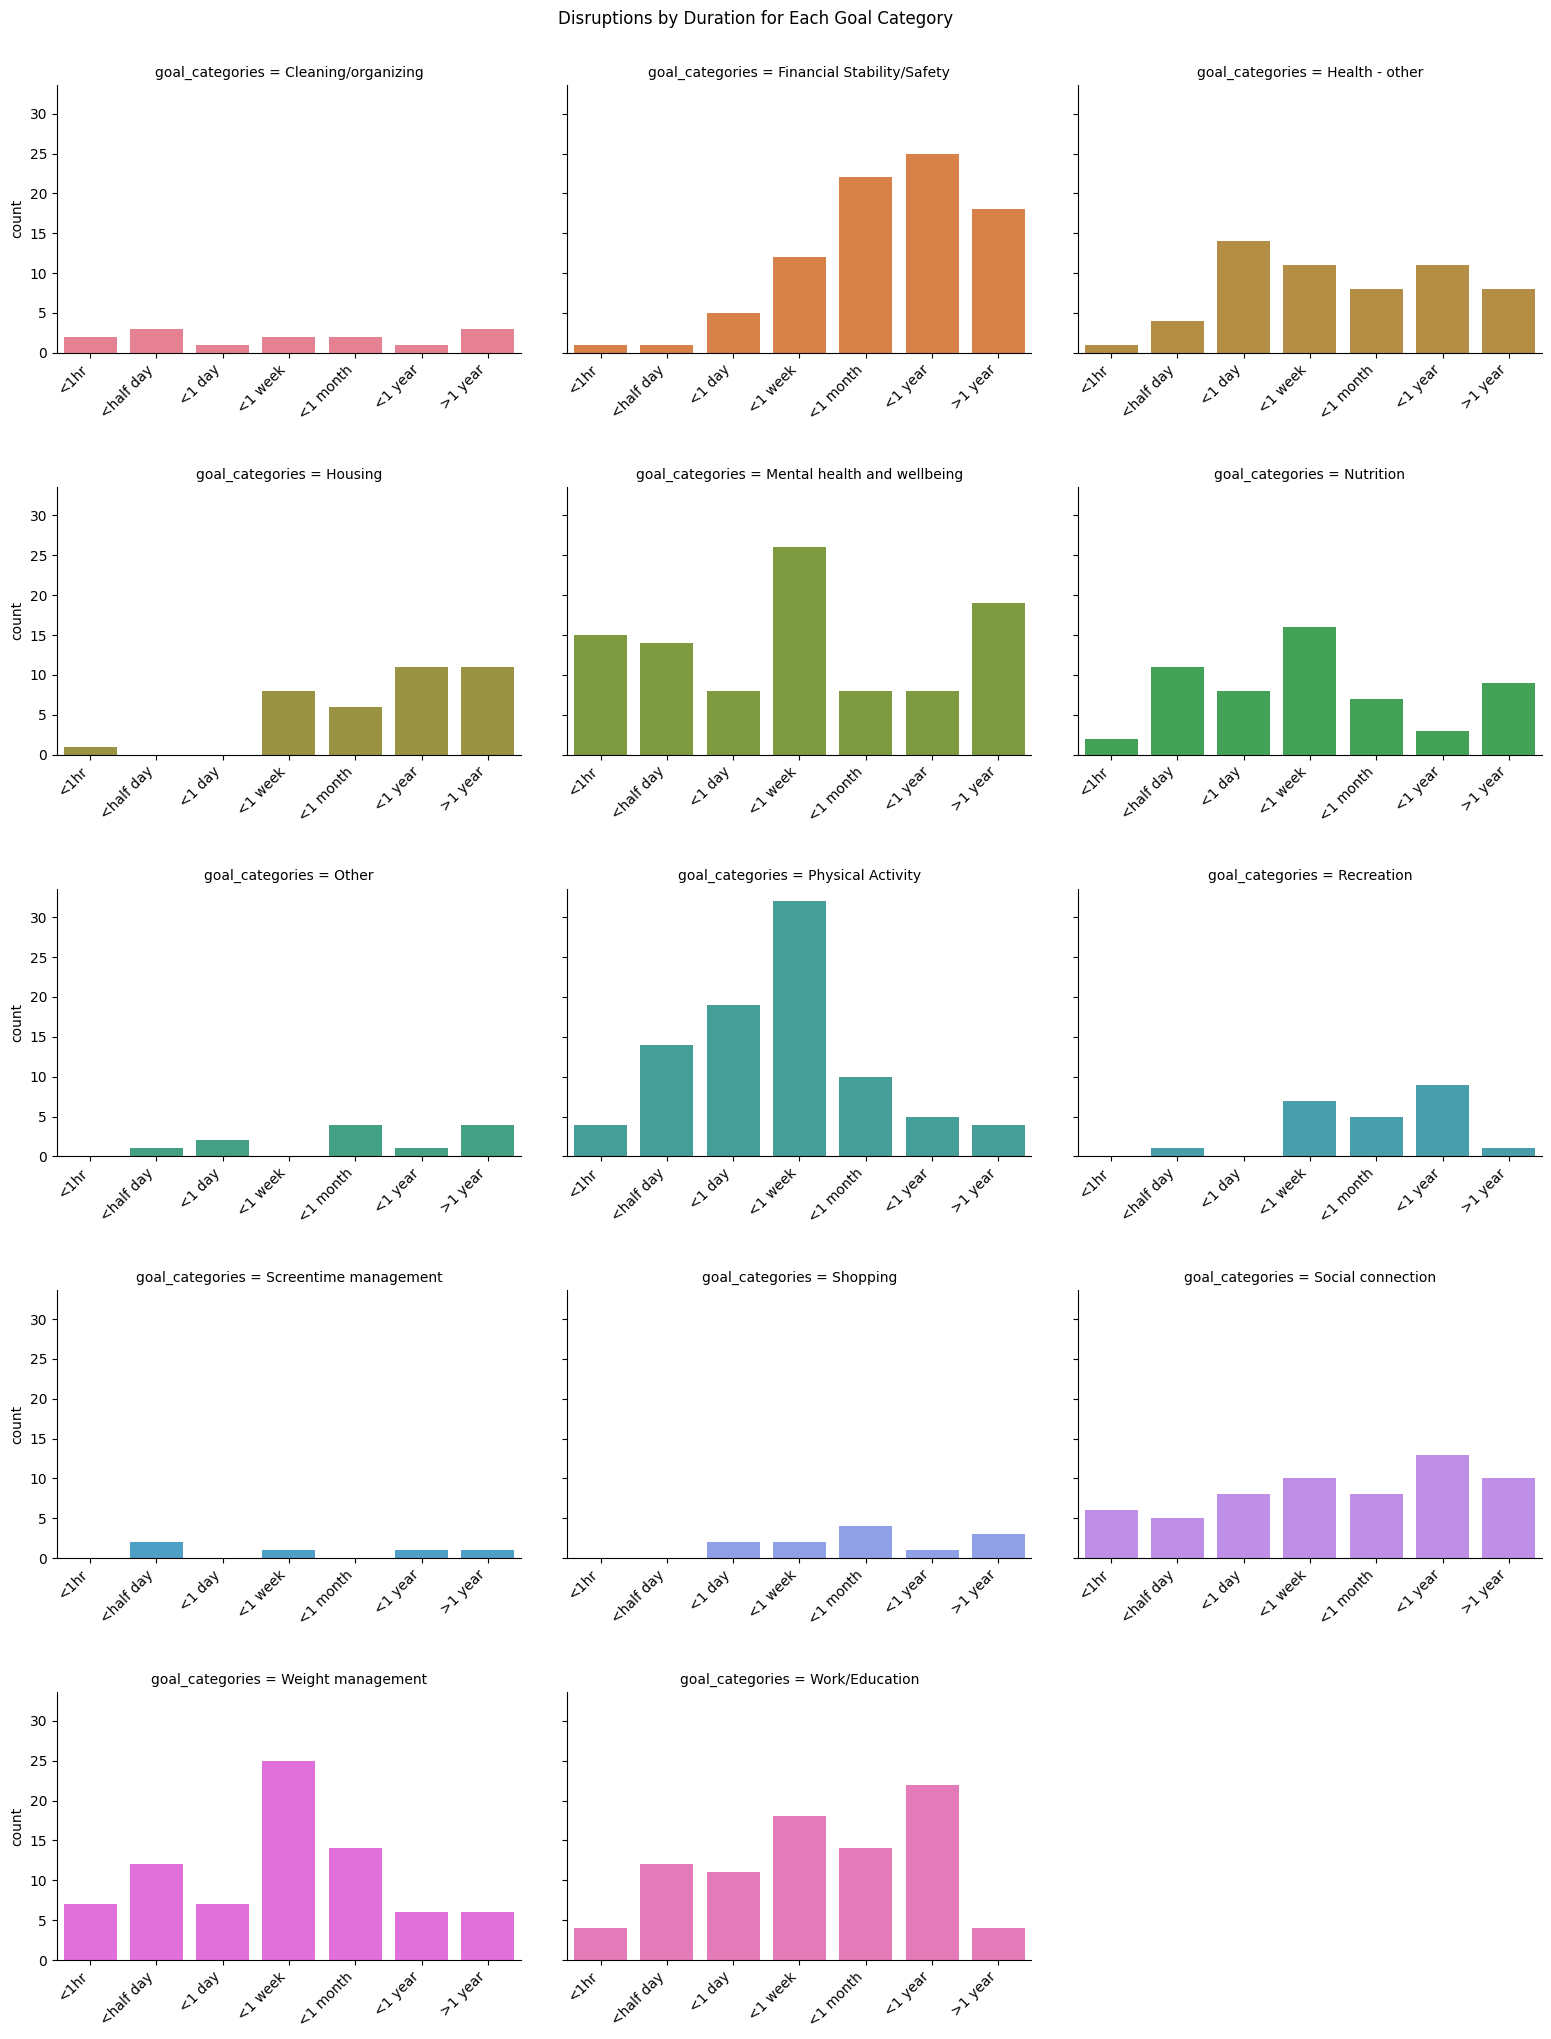

In [143]:
# @title
from itertools import count
# prompt: plot disruptions_duration_goaltype in small multiple bar graphs

# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_howlong_df = count_by_goal_howlong.reset_index()
# Rename the label names for clarity
count_by_goal_howlong_df['how-long'] = count_by_goal_howlong_df['how-long'].replace({
    'an hour or less': '<1hr',
    'more than an hour to half a day': '<half day',
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

#rename
count_by_goal_howlong_df.rename(columns={'pid*gid*cid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['<1hr', '<half day', '<1 day', '<1 week', '<1 month', '<1 year', '>1 year']
count_by_goal_howlong_df['how-long'] = pd.Categorical(count_by_goal_howlong_df['how-long'], categories=xlabels_order, ordered=True)


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='how-long', y='count', hue='goal_categories', data=count_by_goal_howlong_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Duration for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

### combining [<1hr,<half day]

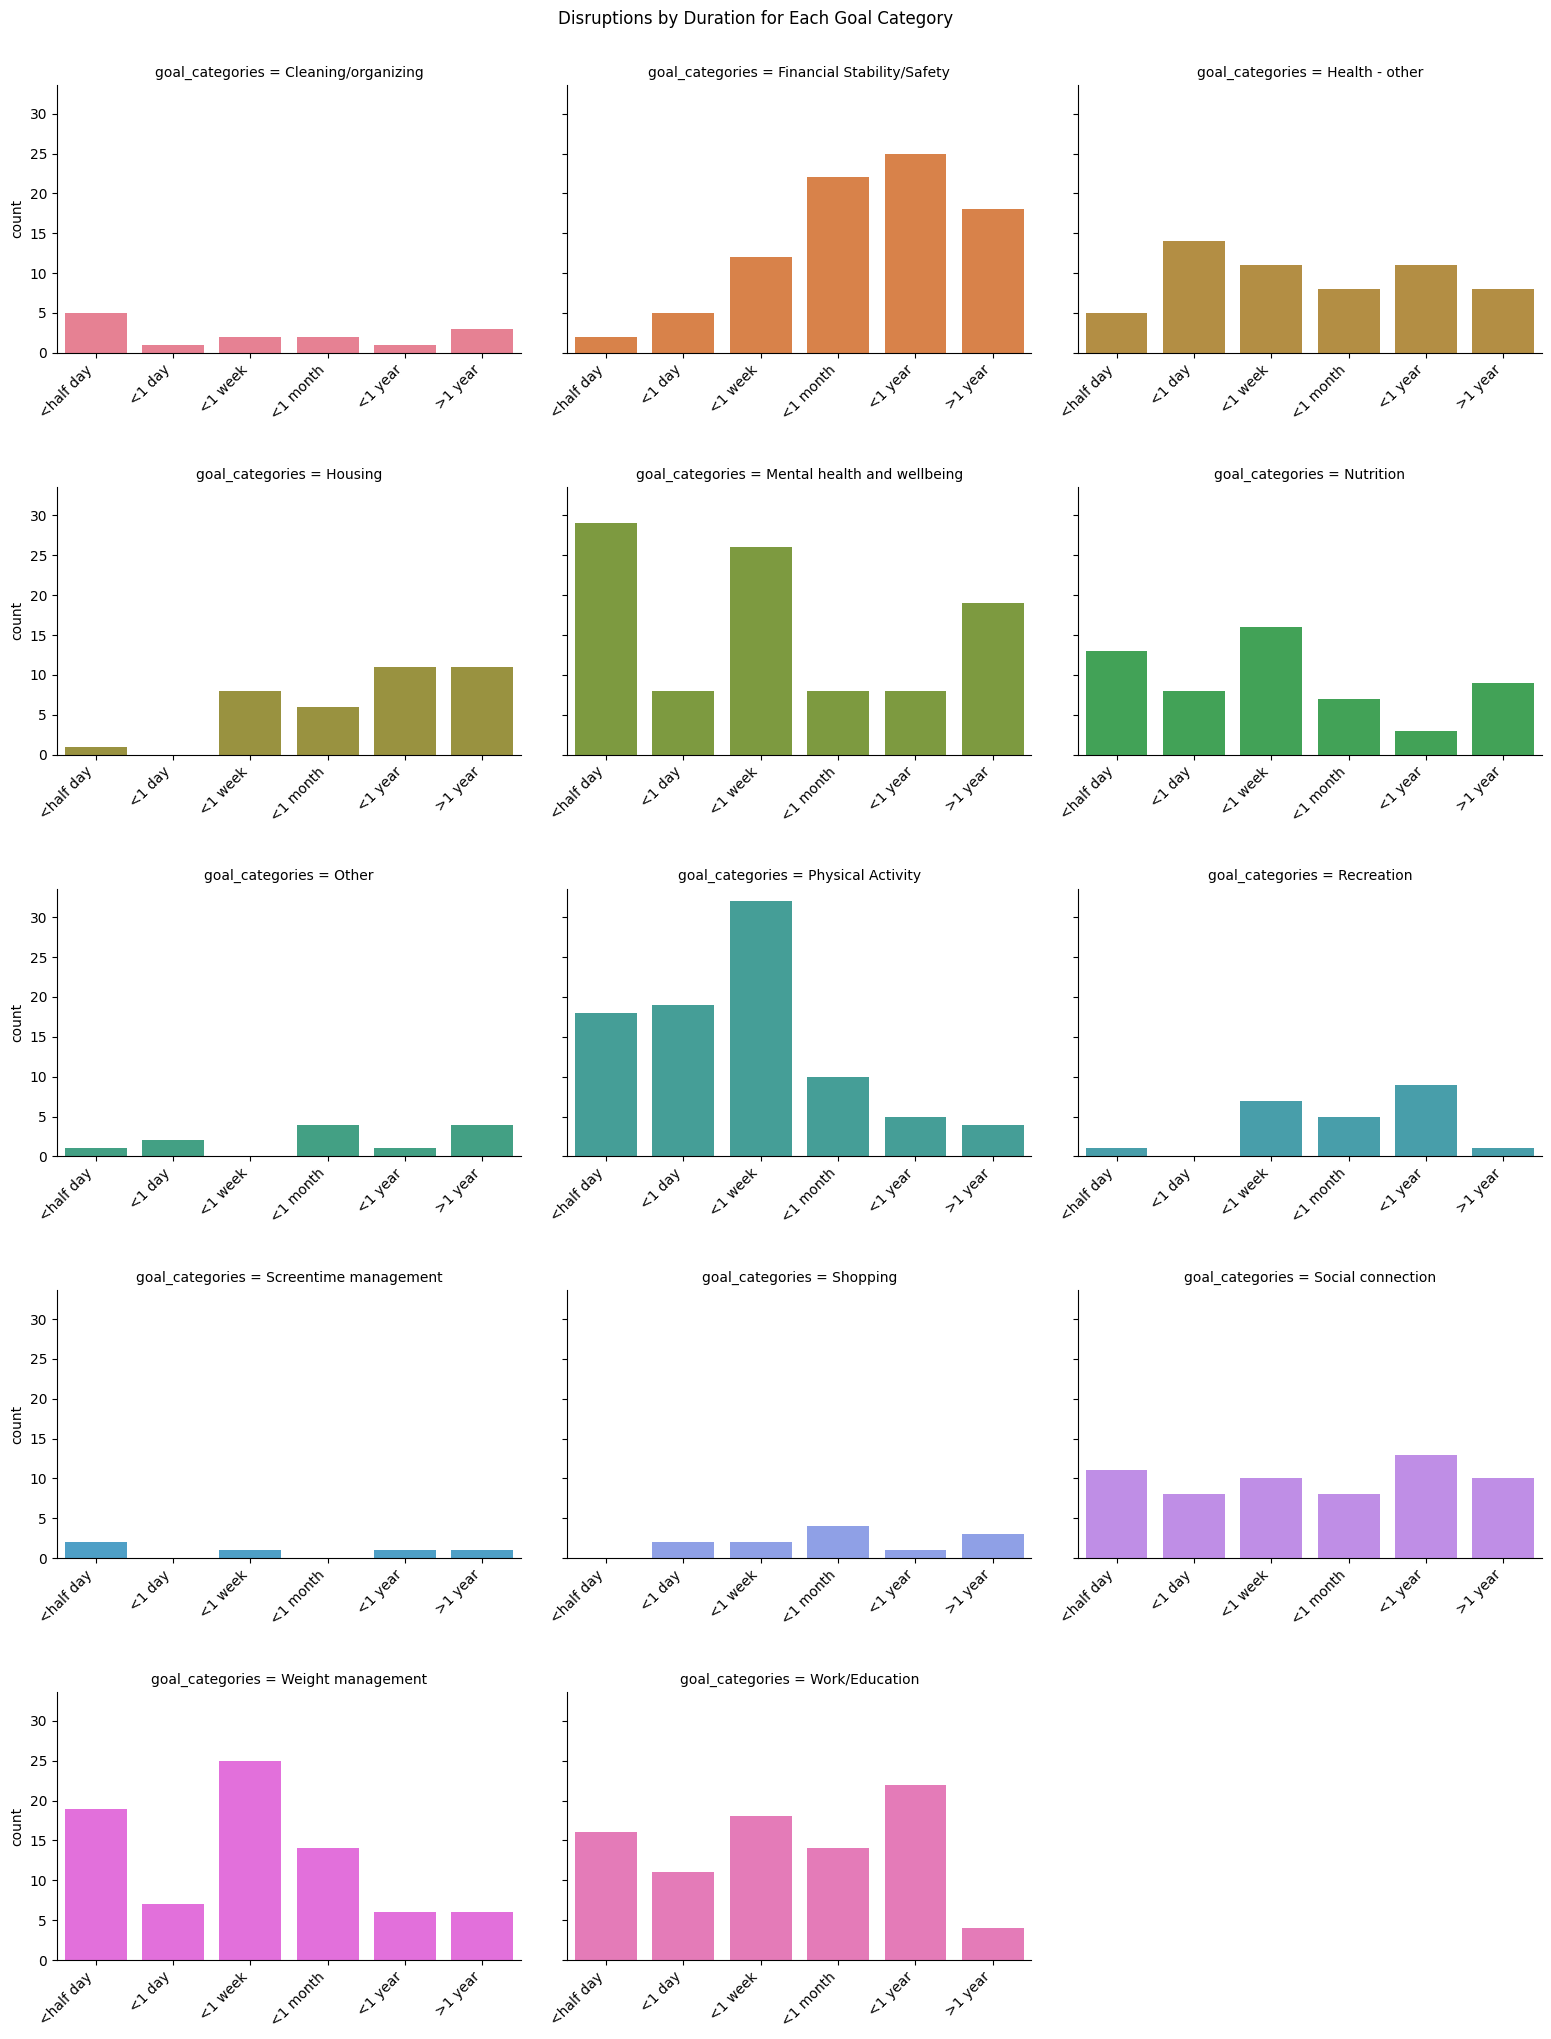

In [144]:
#grouping [<1hr,<half day]
disruptions_duration_goaltype_combo = disruptions_duration_goaltype
disruptions_duration_goaltype_combo['how-long'] = disruptions_duration_goaltype['how-long'].replace({
    'an hour or less': 'more than an hour to half a day'
})


disruptions_duration_goaltype_combo= disruptions_duration_goaltype_combo[['pid*gid*cid', 'how-long', 'goal_categories']]

# Group by goal_categories and how-long and count the number of values
count_by_goal_howlong_c = disruptions_duration_goaltype_combo.groupby(['goal_categories', 'how-long'])['pid*gid*cid'].count()

# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_howlong_c_df = count_by_goal_howlong_c.reset_index()
# Rename the label names for clarity
count_by_goal_howlong_c_df['how-long'] = count_by_goal_howlong_c_df['how-long'].replace({
    'more than an hour to half a day': '<half day',
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

#rename
count_by_goal_howlong_c_df.rename(columns={'pid*gid*cid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['<half day', '<1 day', '<1 week', '<1 month', '<1 year', '>1 year']
count_by_goal_howlong_c_df['how-long'] = pd.Categorical(count_by_goal_howlong_c_df['how-long'], categories=xlabels_order, ordered=True)


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='how-long', y='count', hue='goal_categories', data=count_by_goal_howlong_c_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Duration for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

## number of disruptions of different frequency for each goal category

filter out rows with
disruption = “no disruption”

OR "how-long" = no-disruption or no-response

include rows with disruption labor = no response because it is still a disruption



In [145]:
# @title

df['pid*gid*cid'] = df['pid'] + "*" + df['gid'] + "*" + df['cid']

len(df['pid*gid*cid'])
df['pid*gid*cid'].nunique()

disruptions_frequency_goaltype = df[['pid', 'gid', 'pid*gid', 'pid*gid*cid', 'goal_categories','frequency', 'disruption_status']]


#filter out no disruptions
disruptions_frequency_goaltype = disruptions_frequency_goaltype[disruptions_frequency_goaltype['disruption_status'] == 'Disruption']

#filter out no response
disruptions_frequency_goaltype = disruptions_frequency_goaltype[disruptions_frequency_goaltype['frequency'] != 'No response']

#grouping [chronic and sleep] and [work and education]
disruptions_frequency_goaltype['goal_categories'] = disruptions_frequency_goaltype['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})


disruptions_frequency_goaltype = disruptions_frequency_goaltype[['pid*gid*cid', 'frequency', 'goal_categories']]

# Group by goal_categories and frequency and count the number of values
count_by_goal_frequency = disruptions_frequency_goaltype.groupby(['goal_categories', 'frequency'])['pid*gid*cid'].count()
print(count_by_goal_frequency.to_string()) # Use .to_string() to display all rows of the Series


goal_categories              frequency       
Cleaning/organizing          daily                6
                             every other week     2
                             monthly              1
                             weekly               3
                             yearly or less       2
Financial Stability/Safety   daily               17
                             every 6 months      10
                             every other week     9
                             monthly             22
                             weekly               7
                             yearly or less      19
Health - other               daily               17
                             every 6 months       7
                             every other week     5
                             monthly             12
                             weekly              13
                             yearly or less       3
Housing                      daily               10
                  

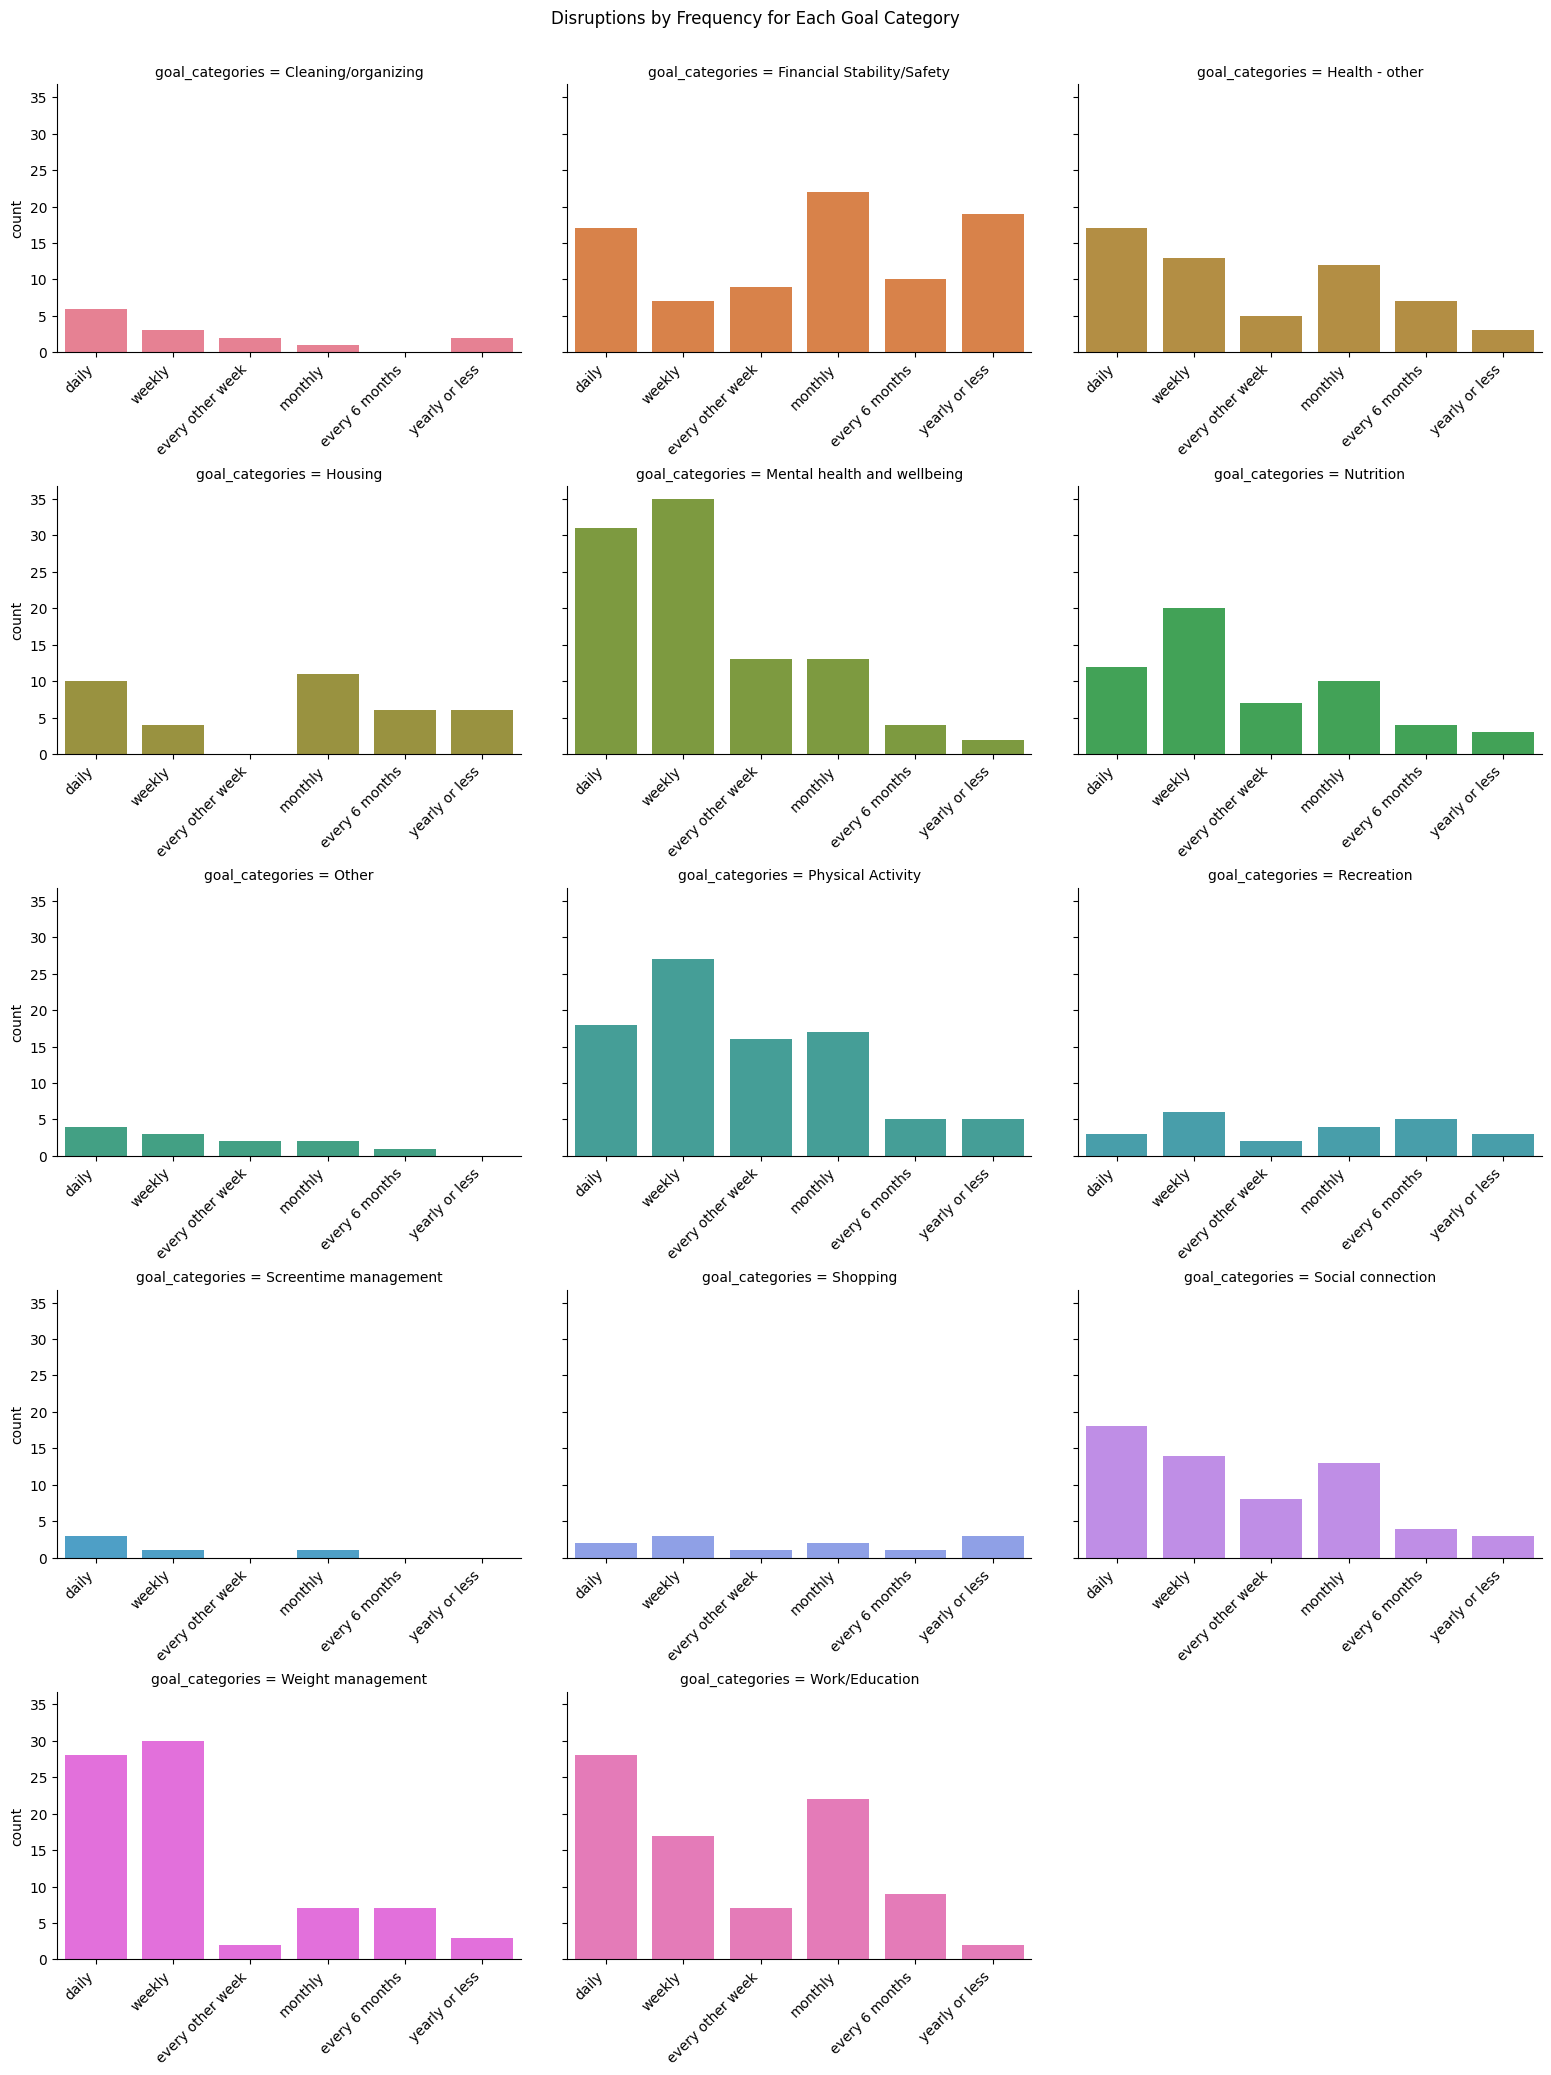

In [146]:
# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_freq_df = count_by_goal_frequency.reset_index()

#rename
count_by_goal_freq_df.rename(columns={'pid*gid*cid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['daily','weekly','every other week', 'monthly','every 6 months','yearly or less']

count_by_goal_freq_df['frequency'] = pd.Categorical(count_by_goal_freq_df['frequency'], categories=xlabels_order, ordered=True)


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='frequency', y='count', hue='goal_categories', data=count_by_goal_freq_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Frequency for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

## number of disruptions with different adjustments for each goal category


In [147]:
df['pid*gid*cid'] = df['pid'] + "*" + df['gid'] + "*" + df['cid']

len(df['pid*gid*cid'])
df['pid*gid*cid'].nunique()

disruptions_changes_goaltype = df[['pid', 'gid', 'pid*gid', 'pid*gid*cid', 'goal_categories','goal_changes', 'disruption_status']]


#filter out no disruptions
disruptions_changes_goaltype = disruptions_changes_goaltype[disruptions_changes_goaltype['disruption_status'] == 'Disruption']

#filter out no response
disruptions_changes_goaltype = disruptions_changes_goaltype[disruptions_changes_goaltype['goal_changes'] != 'No response']

#grouping [chronic and sleep] and [work and education]
disruptions_changes_goaltype['goal_categories'] = disruptions_changes_goaltype['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})


disruptions_changes_goaltype = disruptions_changes_goaltype[['pid*gid*cid', 'goal_changes', 'goal_categories']]

# Group by goal_categories and frequency and count the number of values
count_by_goal_changes = disruptions_changes_goaltype.groupby(['goal_categories', 'goal_changes'])['pid*gid*cid'].count()
print(count_by_goal_changes.to_string()) # Use .to_string() to display all rows of the Series


goal_categories              goal_changes    
Cleaning/organizing          Abandoned            1
                             Changed strategy     5
                             Changed time         3
                             No change            2
                             Rescheduled          1
                             Skipped              3
Financial Stability/Safety   Abandoned            5
                             Changed strategy    31
                             Changed time         8
                             No change            9
                             Other                1
                             Paused               8
                             Rescheduled          1
                             Skipped             17
Health - other               Abandoned            2
                             Changed strategy    26
                             Changed time         4
                             No change            5
                  

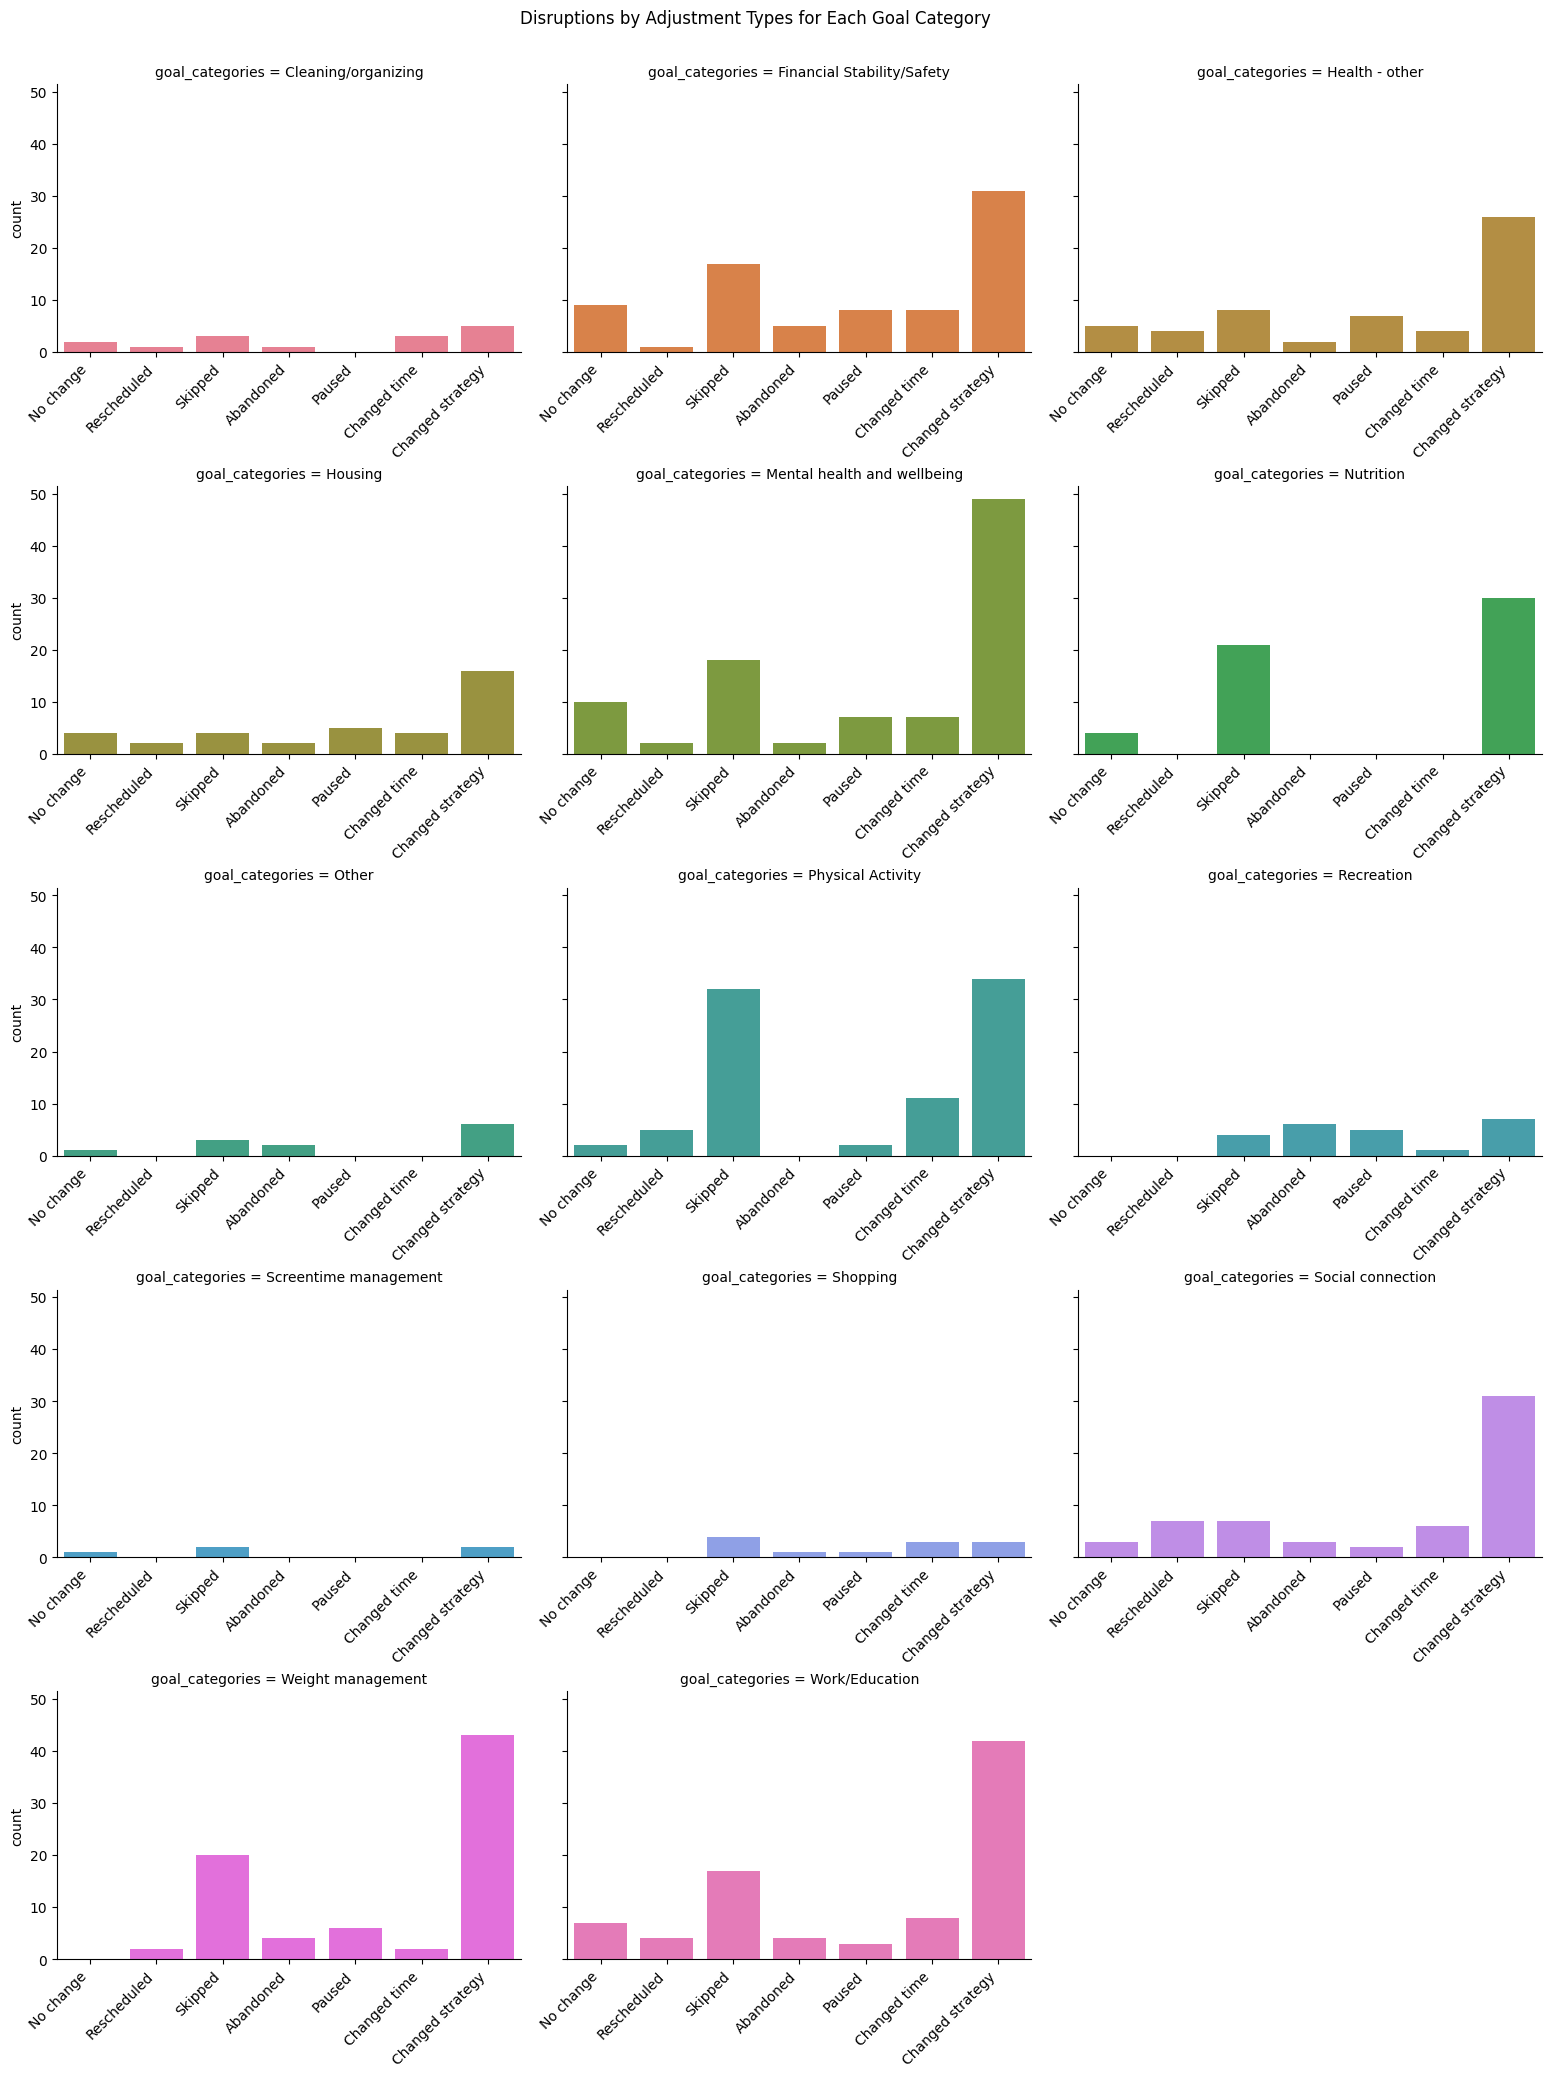

In [148]:
# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_changes_df = count_by_goal_changes.reset_index()

#rename
count_by_goal_changes_df.rename(columns={'pid*gid*cid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['No change', 'Rescheduled', 'Skipped','Abandoned','Paused', 'Changed time', 'Changed strategy']


count_by_goal_changes_df['goal_changes'] = pd.Categorical(count_by_goal_changes_df['goal_changes'], categories=xlabels_order, ordered=True)


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='goal_changes', y='count', hue='goal_categories', data=count_by_goal_changes_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Adjustment Types for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

## number of disruptions by type of burden created for each goal category

In [149]:
df['pid*gid*cid'] = df['pid'] + "*" + df['gid'] + "*" + df['cid']

len(df['pid*gid*cid'])
df['pid*gid*cid'].nunique()

disruptions_burden_goaltype = df[['pid', 'gid', 'pid*gid', 'pid*gid*cid', 'goal_categories','disruption_labor_aggregated', 'disruption_status']]
#filter out no disruptions
disruptions_burden_goaltype = disruptions_burden_goaltype[disruptions_burden_goaltype['disruption_status'] == 'Disruption']

# explode this column to ensure each disruption labor type is in a single row

survey_data_exploded = disruptions_burden_goaltype.assign(disruption_labor_split=disruptions_burden_goaltype['disruption_labor_aggregated'].str.split(', ')).explode('disruption_labor_split')


# Filter out 'No response', 'No labor- positive disruption', 'Other' before unstacking
survey_data_exploded = survey_data_exploded[~survey_data_exploded['disruption_labor_split'].isin(['No response','No labor- positive disruption','Other'])]

#grouping [chronic and sleep] and [work and education]
survey_data_exploded['goal_categories'] = survey_data_exploded['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})

survey_data_exploded = survey_data_exploded[['pid*gid*cid', 'disruption_labor_split', 'goal_categories']]

# Group by goal_categories and frequency and count the number of values
count_by_goal_burden = survey_data_exploded.groupby(['goal_categories', 'disruption_labor_split'])['pid*gid*cid'].count()

print(count_by_goal_burden.to_string()) # Use .to_string() to display all rows of the DataFrame


# Perform groupby and unstack to get the desired format
#disruption_labor_data = survey_data_exploded.groupby(['goal_categories', 'disruption_labor_split'])['pid*gid*cid'].count()

# Reset index to make 'goal_categories' a column again
#disruption_labor_data = disruption_labor_data.reset_index()

goal_categories              disruption_labor_split
Cleaning/organizing          Emotional                  7
                             Logistical                 1
                             Physical                   5
Financial Stability/Safety   Emotional                 59
                             Financial                 31
                             Logistical                24
                             Physical                   7
Health - other               Emotional                 37
                             Financial                  3
                             Logistical                12
                             Physical                  12
Housing                      Emotional                 23
                             Financial                 10
                             Logistical                 4
                             Physical                   1
Mental health and wellbeing  Emotional                 85
                    

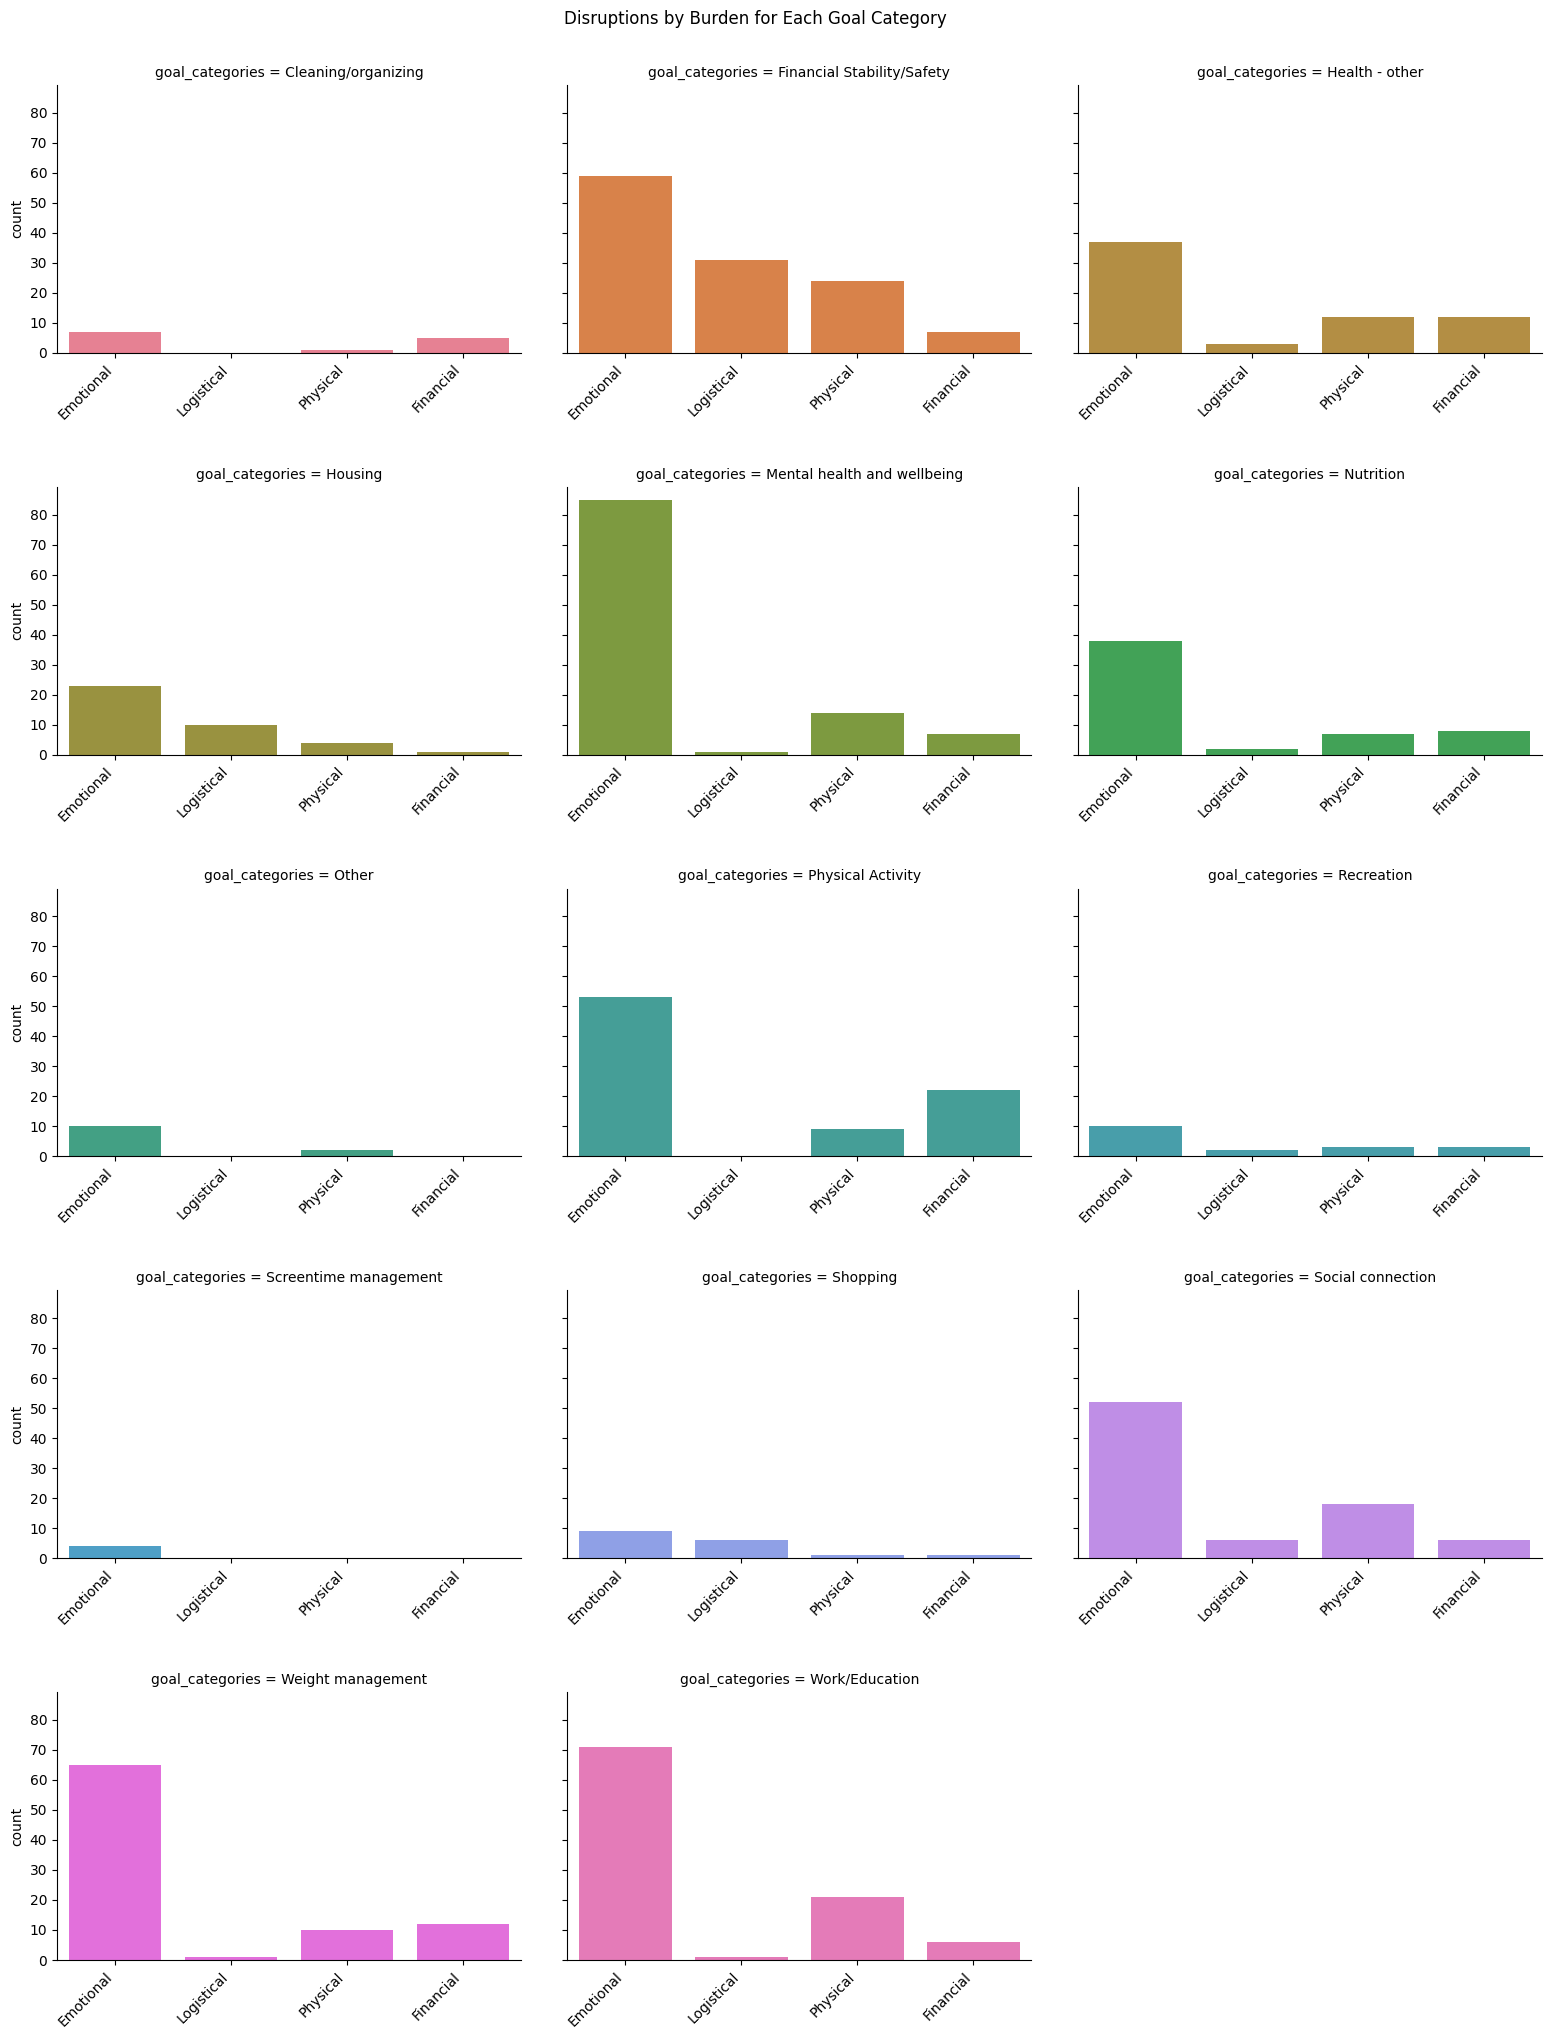

In [150]:
# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_burden_df = count_by_goal_burden.reset_index()

#rename
count_by_goal_burden_df.rename(columns={'pid*gid*cid': 'count'}, inplace=True)


count_by_goal_burden_df['disruption_labor_split'] = pd.Categorical(count_by_goal_burden_df['disruption_labor_split'])

# get label and set order
xlabels_order = ['Emotional', 'Logistical', 'Physical','Financial']


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='disruption_labor_split', y='count', hue='goal_categories', data=count_by_goal_burden_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Burden for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order,rotation=45, ha='right')

plt.show()



---
# breakdown of number of unique participants who reported a disruption

## number of unique participants who reported a disruption


In [151]:
# @title
df_goalcategories = df[['pid', 'goal_categories', 'situation_that_occurred', 'disruption_status']]

# drop duplicates
df_goalcategories = df_goalcategories[['pid','goal_categories','situation_that_occurred']].drop_duplicates()

#creating new dataframe for combined categories
df_goalcategories_combined['goal_categories'] = df_goalcategories['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})

#filter out unique values
disruption_by_category = disruptions_by_goal_type_combined.groupby('pid')['goal_categories'].unique()
disruption_by_category = disruption_by_category.reset_index()
# prompt: convert disruption_by_category into a dataframe with pid and goal_categories in separate rows
disruption_by_category= disruption_by_category.explode('goal_categories')

# prompt: dataframe with count of pid for goal_categories in disruption_by_category

disruption_pid_count = disruption_by_category.groupby('goal_categories')['pid'].nunique().reset_index()
disruption_pid_count = disruption_pid_count.rename(columns={'pid': 'count_of_par_disruptions_reported'})
disruption_pid_count

<ipython-input-151-316e55fa70c4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goalcategories_combined['goal_categories'] = df_goalcategories['goal_categories'].replace({


,goal_categories,count_of_par_disruptions_reported
0,Cleaning/organizing,9
1,Finances,65
2,Health,123
3,Other,9
4,Recreation,11
5,Social connection,28
6,Work/Education,40


## number of participants who reported a disruption of different durations for each goal category
filter out rows with disruption = “no disruption”

OR "how-long" = no-disruption or no-response

include rows with disruption labor = no response because it is still a disruption

In [152]:
# @title
pp_disruptions_duration_goaltype = df[['pid', 'goal_categories','how-long', 'disruption_status']]


#filter out no disruptions
pp_disruptions_duration_goaltype = pp_disruptions_duration_goaltype[pp_disruptions_duration_goaltype['disruption_status'] == 'Disruption']

#filter out no response
pp_disruptions_duration_goaltype = pp_disruptions_duration_goaltype[pp_disruptions_duration_goaltype['how-long'] != 'No response']

#grouping [chronic and sleep] and [work and education]
pp_disruptions_duration_goaltype['goal_categories'] = pp_disruptions_duration_goaltype['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})

# prompt: Using dataframe disruptions_duration_goaltype: count of values grouped by goal categories and how-long

# Group by goal_categories and how-long and count the number of values
count_by_goal_howlong = pp_disruptions_duration_goaltype.groupby(['goal_categories', 'how-long'])['pid'].count()
print(count_by_goal_howlong.to_string()) # Use .to_string() to display all rows of the Series

goal_categories              how-long                       
Cleaning/organizing          an hour or less                     2
                             longer than a year                  3
                             more than an hour to half a day     3
                             more than half a day to a day       1
                             multiple days to a week             2
                             multiple months to a year           1
                             multiple weeks to a month           2
Financial Stability/Safety   an hour or less                     1
                             longer than a year                 18
                             more than an hour to half a day     1
                             more than half a day to a day       5
                             multiple days to a week            12
                             multiple months to a year          25
                             multiple weeks to a month          22
H

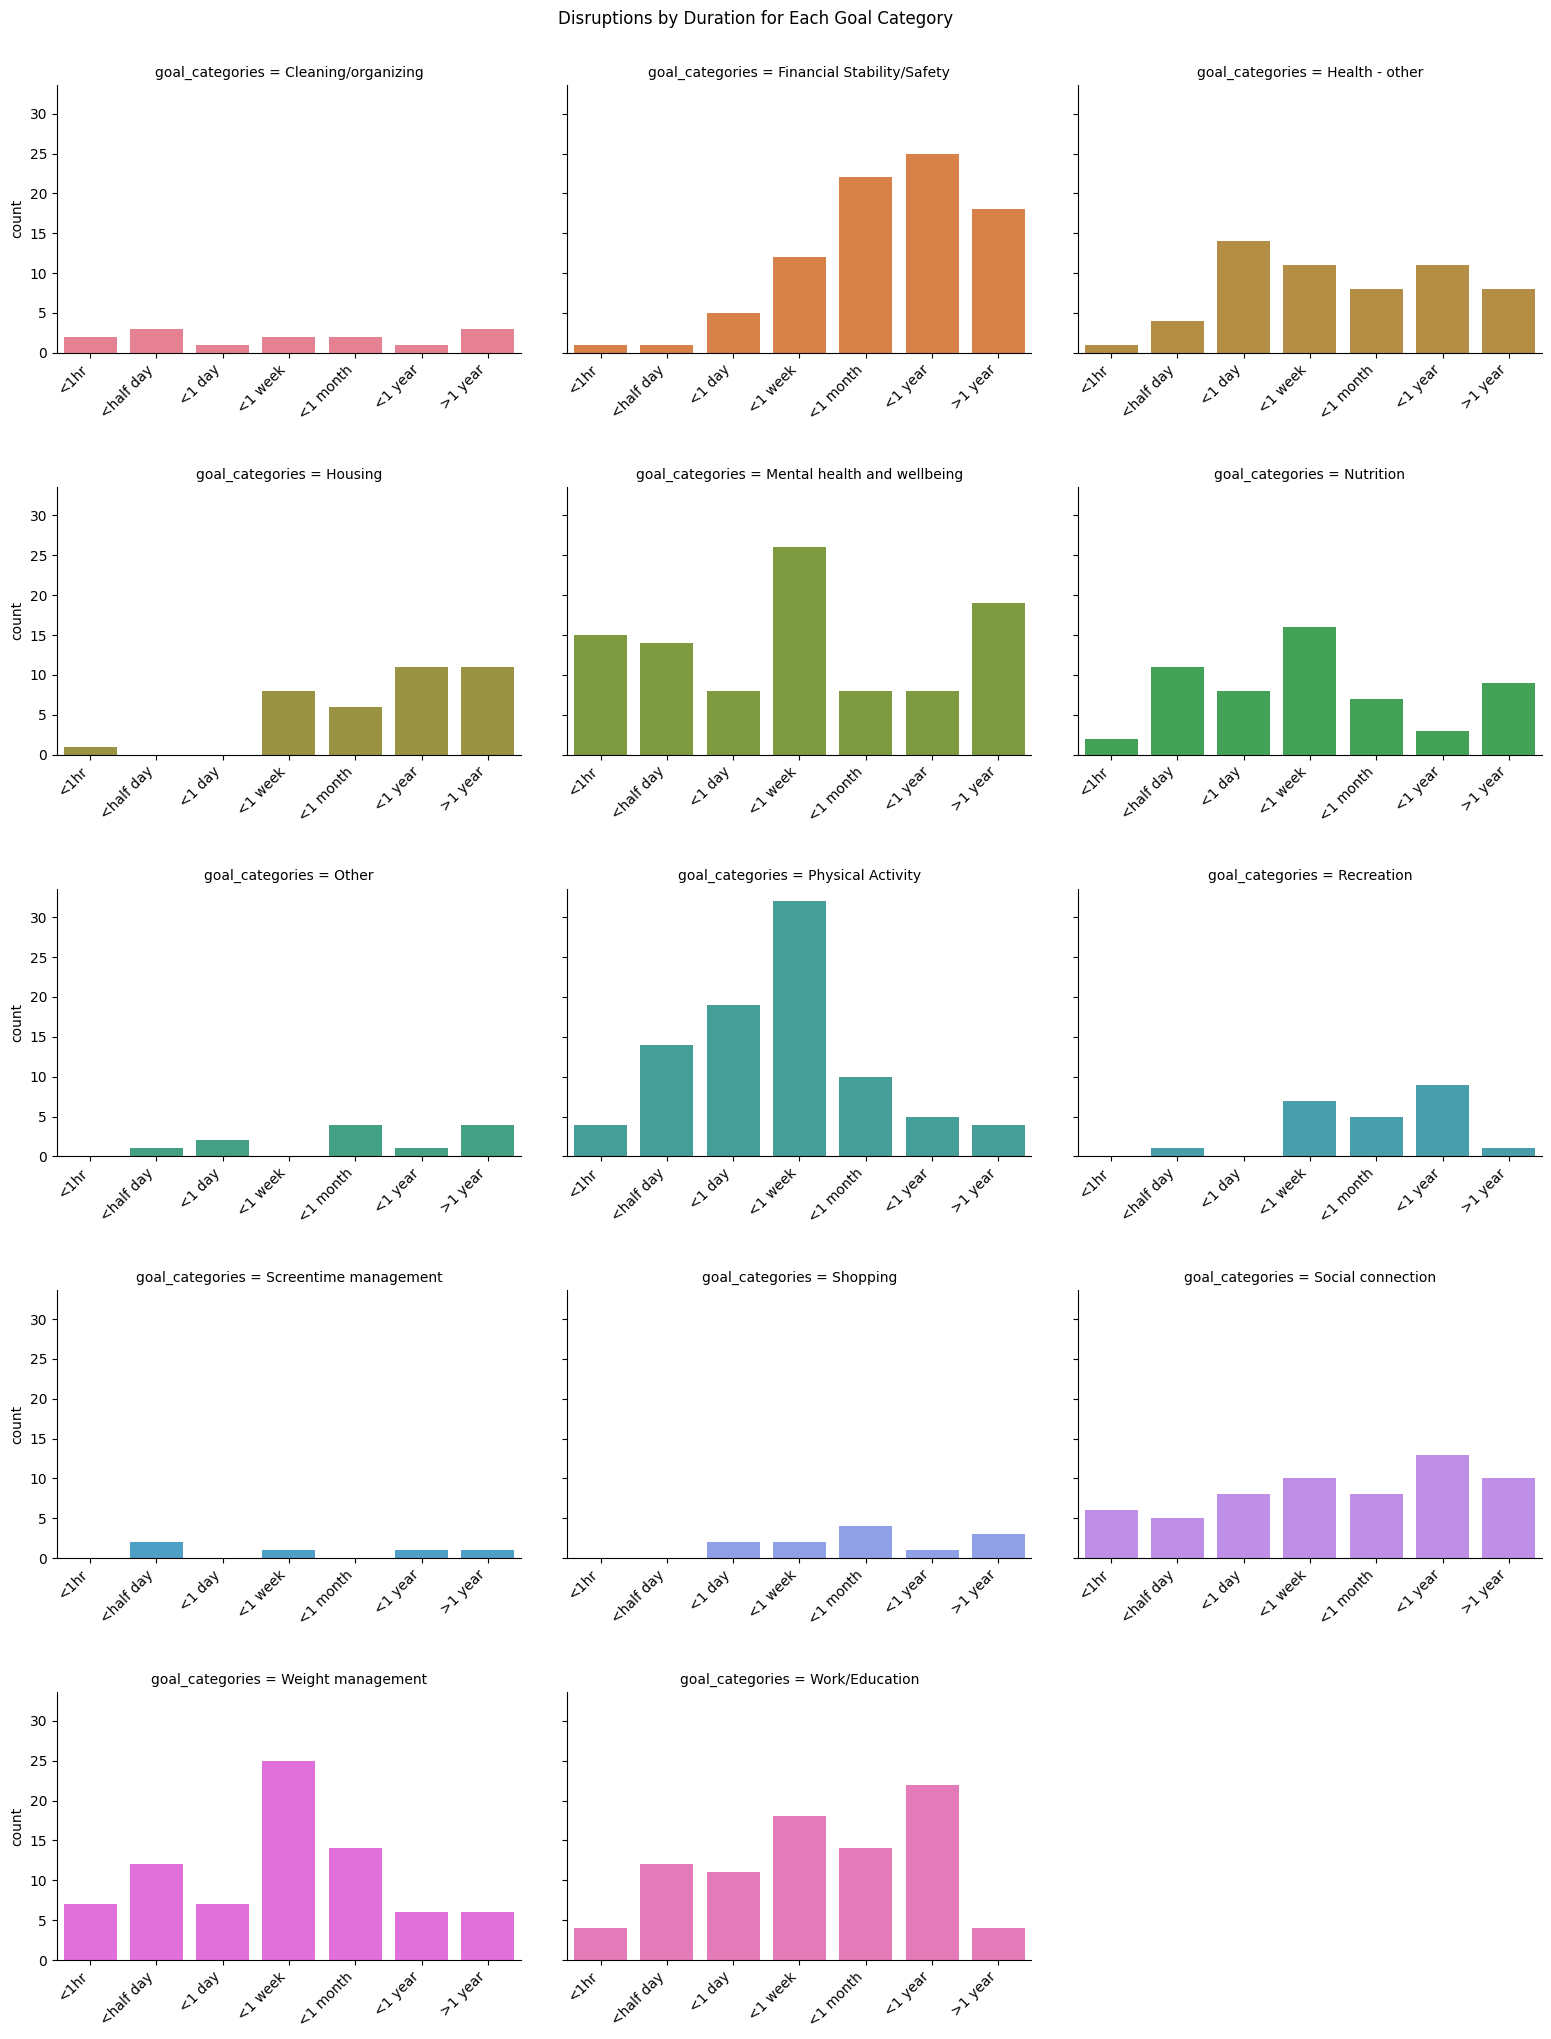

In [153]:
# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_howlong_df = count_by_goal_howlong.reset_index()
# Rename the label names for clarity
count_by_goal_howlong_df['how-long'] = count_by_goal_howlong_df['how-long'].replace({
    'an hour or less': '<1hr',
    'more than an hour to half a day': '<half day',
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

#rename
count_by_goal_howlong_df.rename(columns={'pid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['<1hr', '<half day', '<1 day', '<1 week', '<1 month', '<1 year', '>1 year']
count_by_goal_howlong_df['how-long'] = pd.Categorical(count_by_goal_howlong_df['how-long'], categories=xlabels_order, ordered=True)


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='how-long', y='count', hue='goal_categories', data=count_by_goal_howlong_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Duration for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

### combined 1hr and <half day

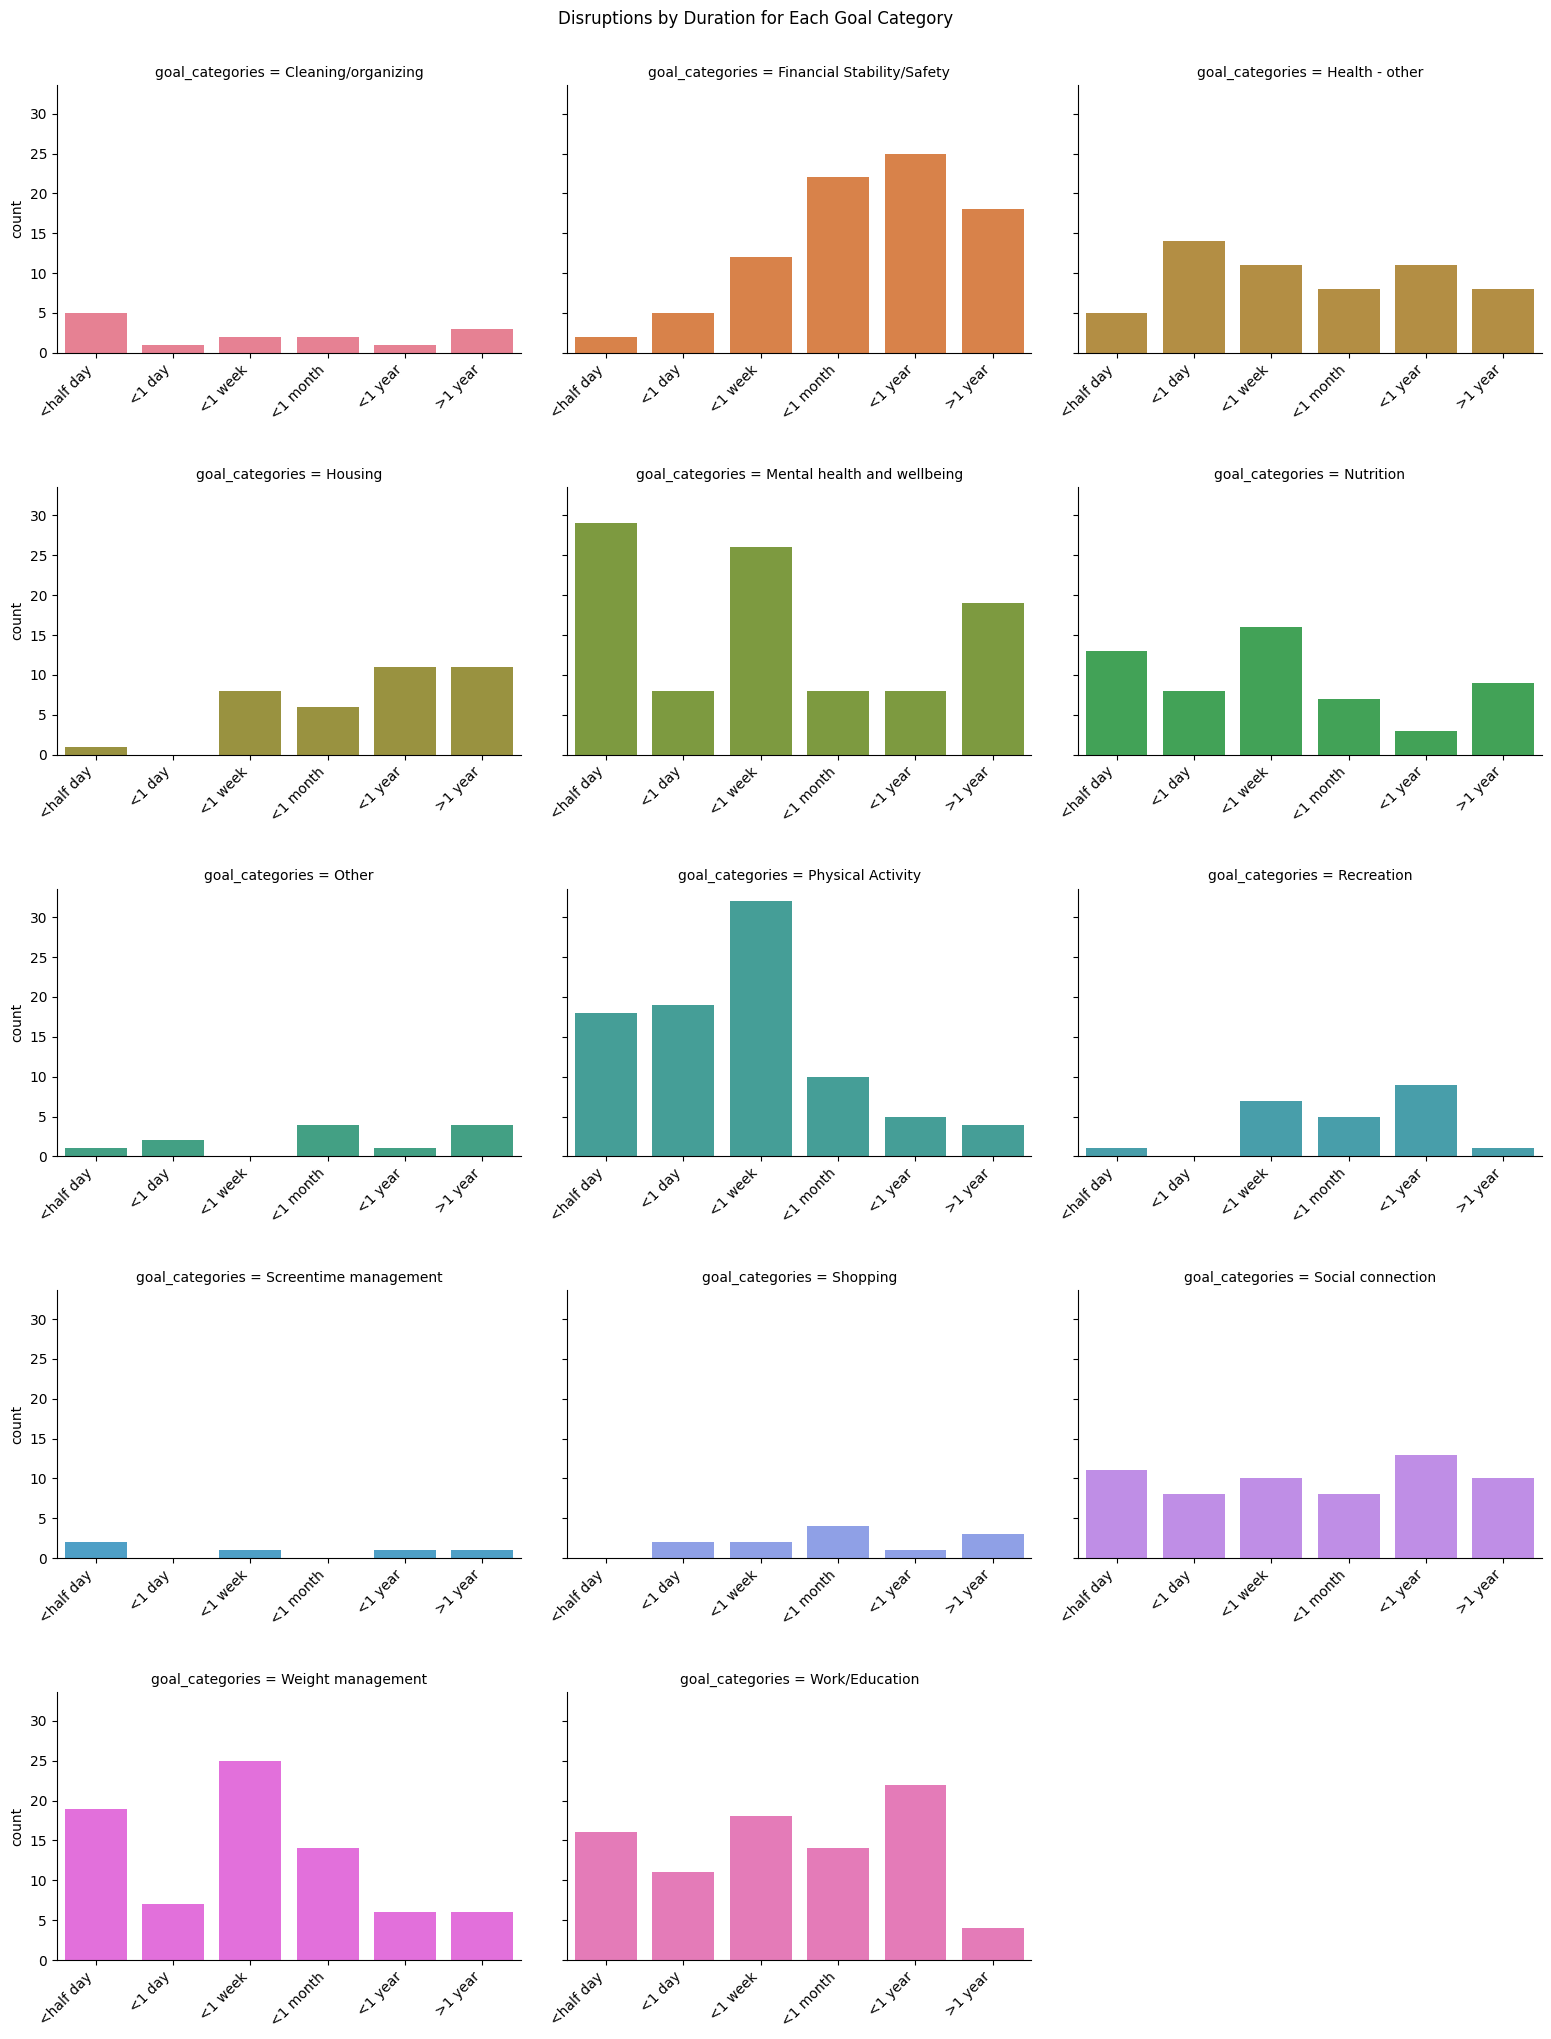

In [154]:
#grouping [<1hr,<half day]
disruptions_duration_goaltype_combo = pp_disruptions_duration_goaltype
disruptions_duration_goaltype_combo['how-long'] = disruptions_duration_goaltype['how-long'].replace({
    'an hour or less': 'more than an hour to half a day'
})


disruptions_duration_goaltype_combo= disruptions_duration_goaltype_combo[['pid', 'how-long', 'goal_categories']]

# Group by goal_categories and how-long and count the number of values
count_by_goal_howlong_c = disruptions_duration_goaltype_combo.groupby(['goal_categories', 'how-long'])['pid'].count()

# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_howlong_c_df = count_by_goal_howlong_c.reset_index()
# Rename the label names for clarity
count_by_goal_howlong_c_df['how-long'] = count_by_goal_howlong_c_df['how-long'].replace({
    'more than an hour to half a day': '<half day',
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

#rename
count_by_goal_howlong_c_df.rename(columns={'pid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['<half day', '<1 day', '<1 week', '<1 month', '<1 year', '>1 year']
count_by_goal_howlong_c_df['how-long'] = pd.Categorical(count_by_goal_howlong_c_df['how-long'], categories=xlabels_order, ordered=True)


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='how-long', y='count', hue='goal_categories', data=count_by_goal_howlong_c_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Duration for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

## of different frequency

In [155]:
df['pid'].nunique()

disruptions_frequency_goaltype = df[['pid', 'gid', 'pid*gid', 'goal_categories','frequency', 'disruption_status']]


#filter out no disruptions
disruptions_frequency_goaltype = disruptions_frequency_goaltype[disruptions_frequency_goaltype['disruption_status'] == 'Disruption']

#filter out no response
disruptions_frequency_goaltype = disruptions_frequency_goaltype[disruptions_frequency_goaltype['frequency'] != 'No response']

#grouping [chronic and sleep] and [work and education]
disruptions_frequency_goaltype['goal_categories'] = disruptions_frequency_goaltype['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})


disruptions_frequency_goaltype = disruptions_frequency_goaltype[['pid', 'frequency', 'goal_categories']]

# Group by goal_categories and frequency and count the number of values
count_by_goal_frequency = disruptions_frequency_goaltype.groupby(['goal_categories', 'frequency'])['pid'].count()
print(count_by_goal_frequency.to_string()) # Use .to_string() to display all rows of the Series

goal_categories              frequency       
Cleaning/organizing          daily                6
                             every other week     2
                             monthly              1
                             weekly               3
                             yearly or less       2
Financial Stability/Safety   daily               17
                             every 6 months      10
                             every other week     9
                             monthly             22
                             weekly               7
                             yearly or less      19
Health - other               daily               17
                             every 6 months       7
                             every other week     5
                             monthly             12
                             weekly              13
                             yearly or less       3
Housing                      daily               10
                  

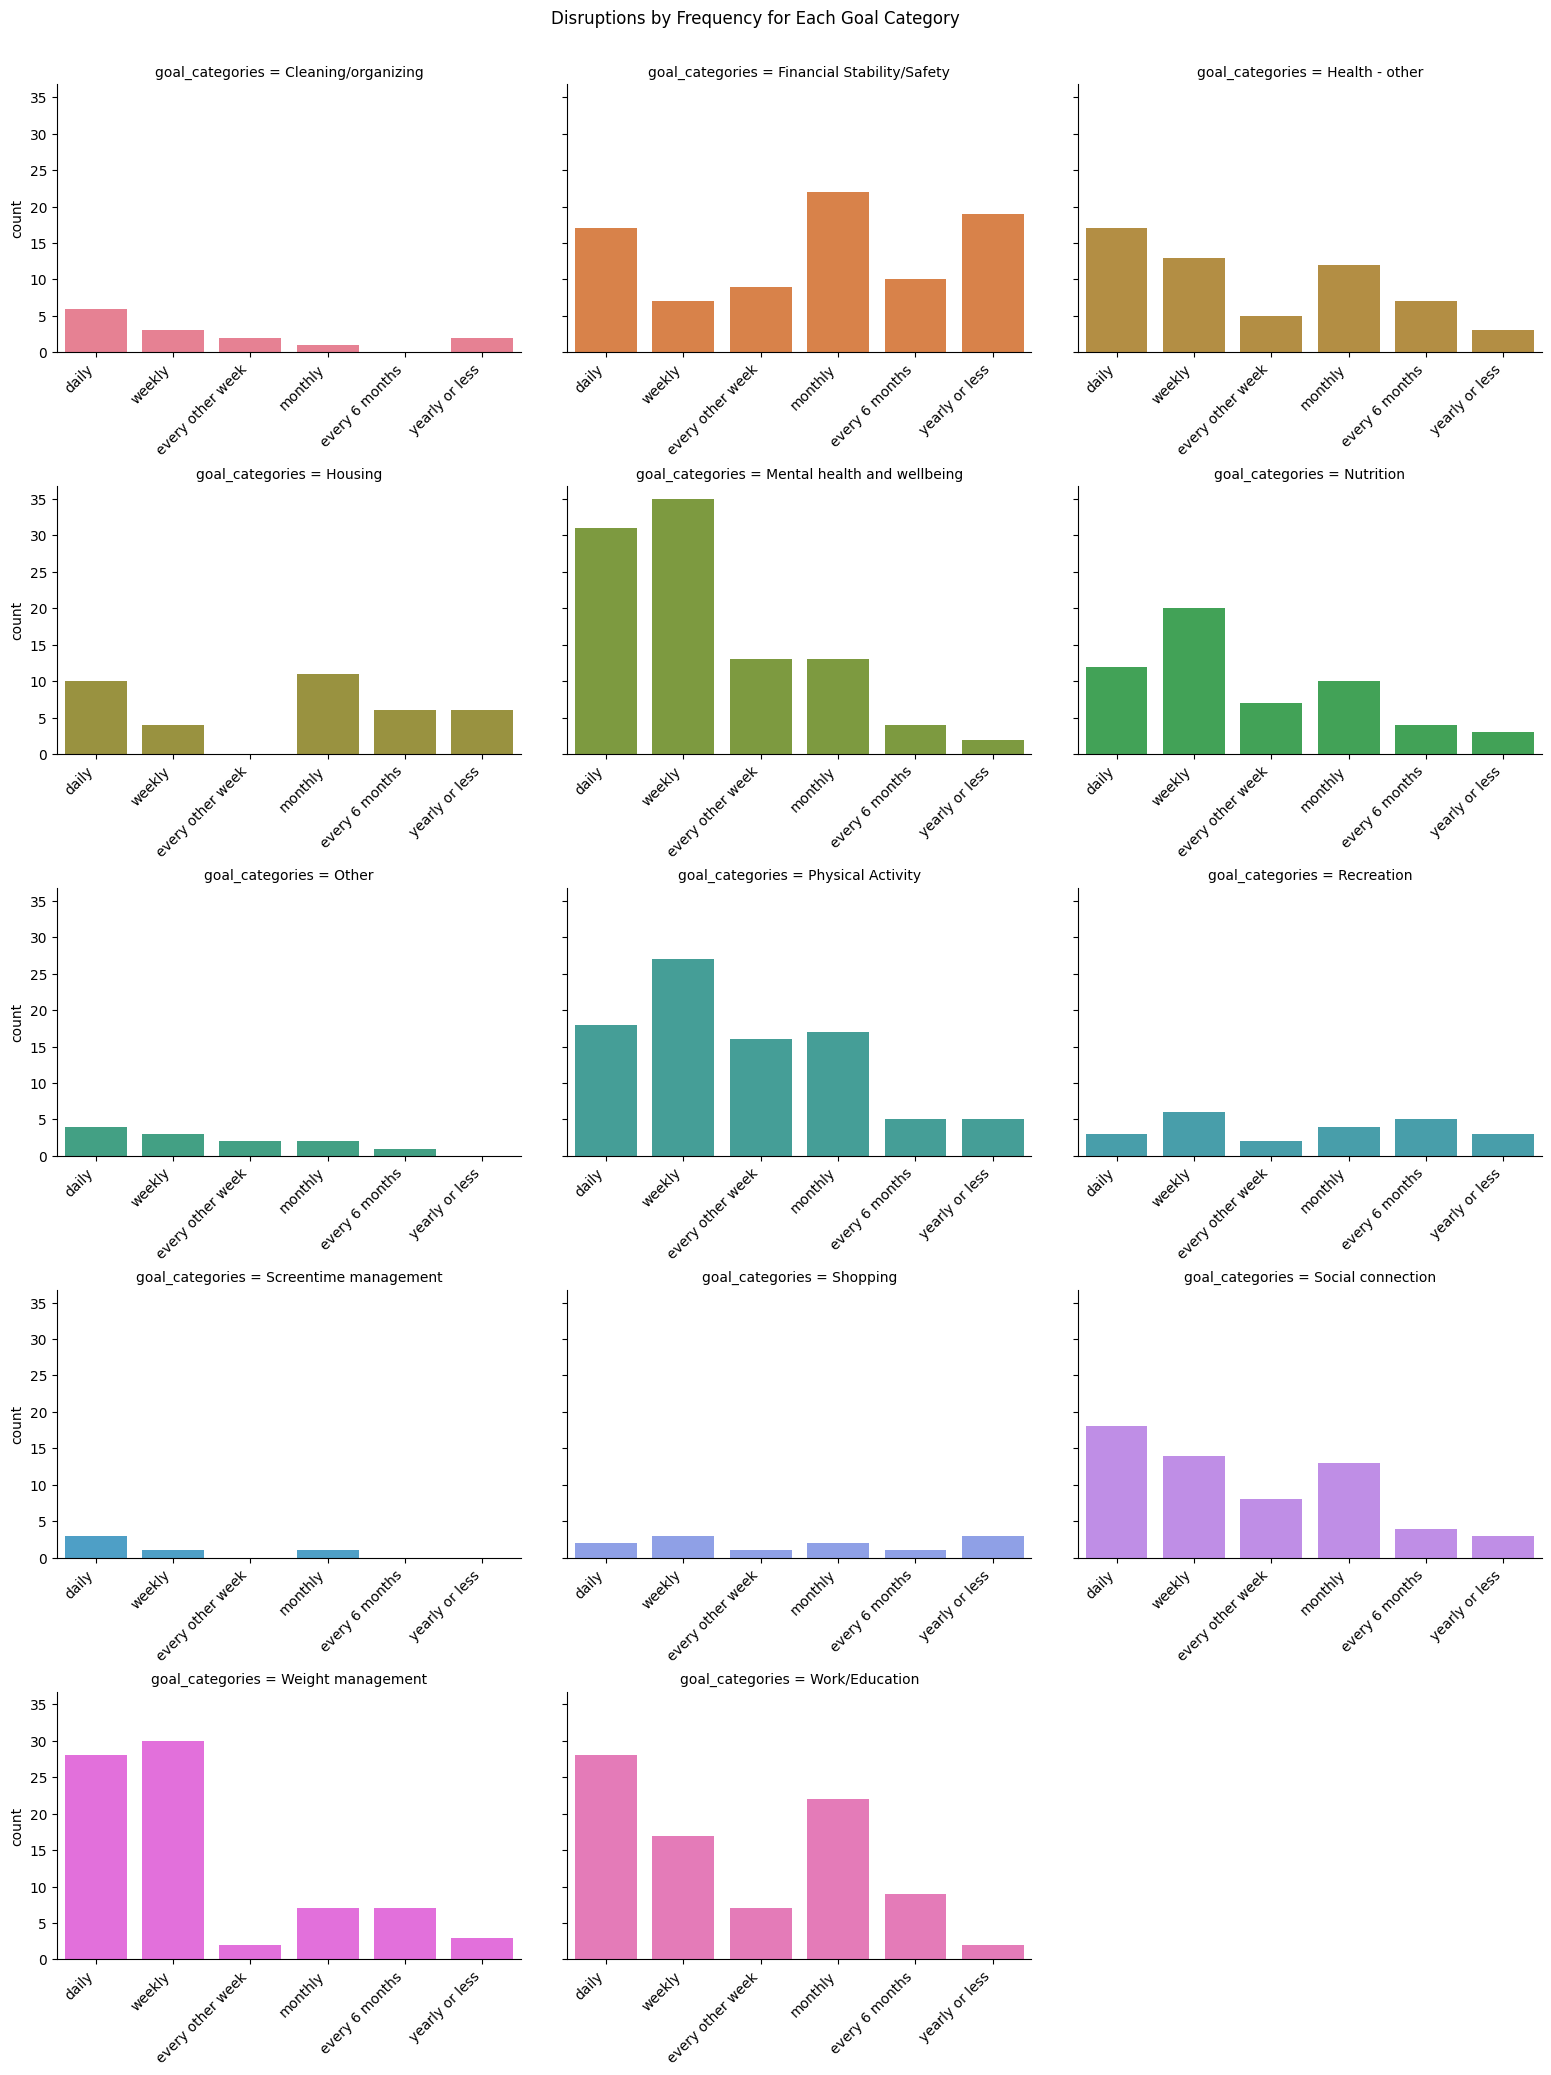

In [156]:
# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_howlong_df = count_by_goal_howlong.reset_index()
# Rename the label names for clarity
count_by_goal_howlong_df['how-long'] = count_by_goal_howlong_df['how-long'].replace({
    'an hour or less': '<1hr',
    'more than an hour to half a day': '<half day',
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

#rename
count_by_goal_howlong_df.rename(columns={'pid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['daily','weekly','every other week', 'monthly','every 6 months','yearly or less']

count_by_goal_freq_df['frequency'] = pd.Categorical(count_by_goal_freq_df['frequency'], categories=xlabels_order, ordered=True)


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='frequency', y='count', hue='goal_categories', data=count_by_goal_freq_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Frequency for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

## number of participants who reported a disruption with different adjustments for each goal category

In [157]:
pp_disruptions_changes_goaltype = df[['pid', 'gid', 'pid*gid', 'pid*gid*cid', 'goal_categories','goal_changes', 'disruption_status']]


#filter out no disruptions
pp_disruptions_changes_goaltype = pp_disruptions_changes_goaltype[pp_disruptions_changes_goaltype['disruption_status'] == 'Disruption']

#filter out no response
pp_disruptions_changes_goaltype = pp_disruptions_changes_goaltype[pp_disruptions_changes_goaltype['goal_changes'] != 'No response']

#grouping [chronic and sleep] and [work and education]
pp_disruptions_changes_goaltype['goal_categories'] = pp_disruptions_changes_goaltype['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})


pp_disruptions_changes_goaltype = pp_disruptions_changes_goaltype[['pid', 'goal_changes', 'goal_categories']]

# Group by goal_categories and frequency and count the number of values
count_by_goal_changes = pp_disruptions_changes_goaltype.groupby(['goal_categories', 'goal_changes'])['pid'].count()
print(count_by_goal_changes.to_string()) # Use .to_string() to display all rows of the Series

goal_categories              goal_changes    
Cleaning/organizing          Abandoned            1
                             Changed strategy     5
                             Changed time         3
                             No change            2
                             Rescheduled          1
                             Skipped              3
Financial Stability/Safety   Abandoned            5
                             Changed strategy    31
                             Changed time         8
                             No change            9
                             Other                1
                             Paused               8
                             Rescheduled          1
                             Skipped             17
Health - other               Abandoned            2
                             Changed strategy    26
                             Changed time         4
                             No change            5
                  

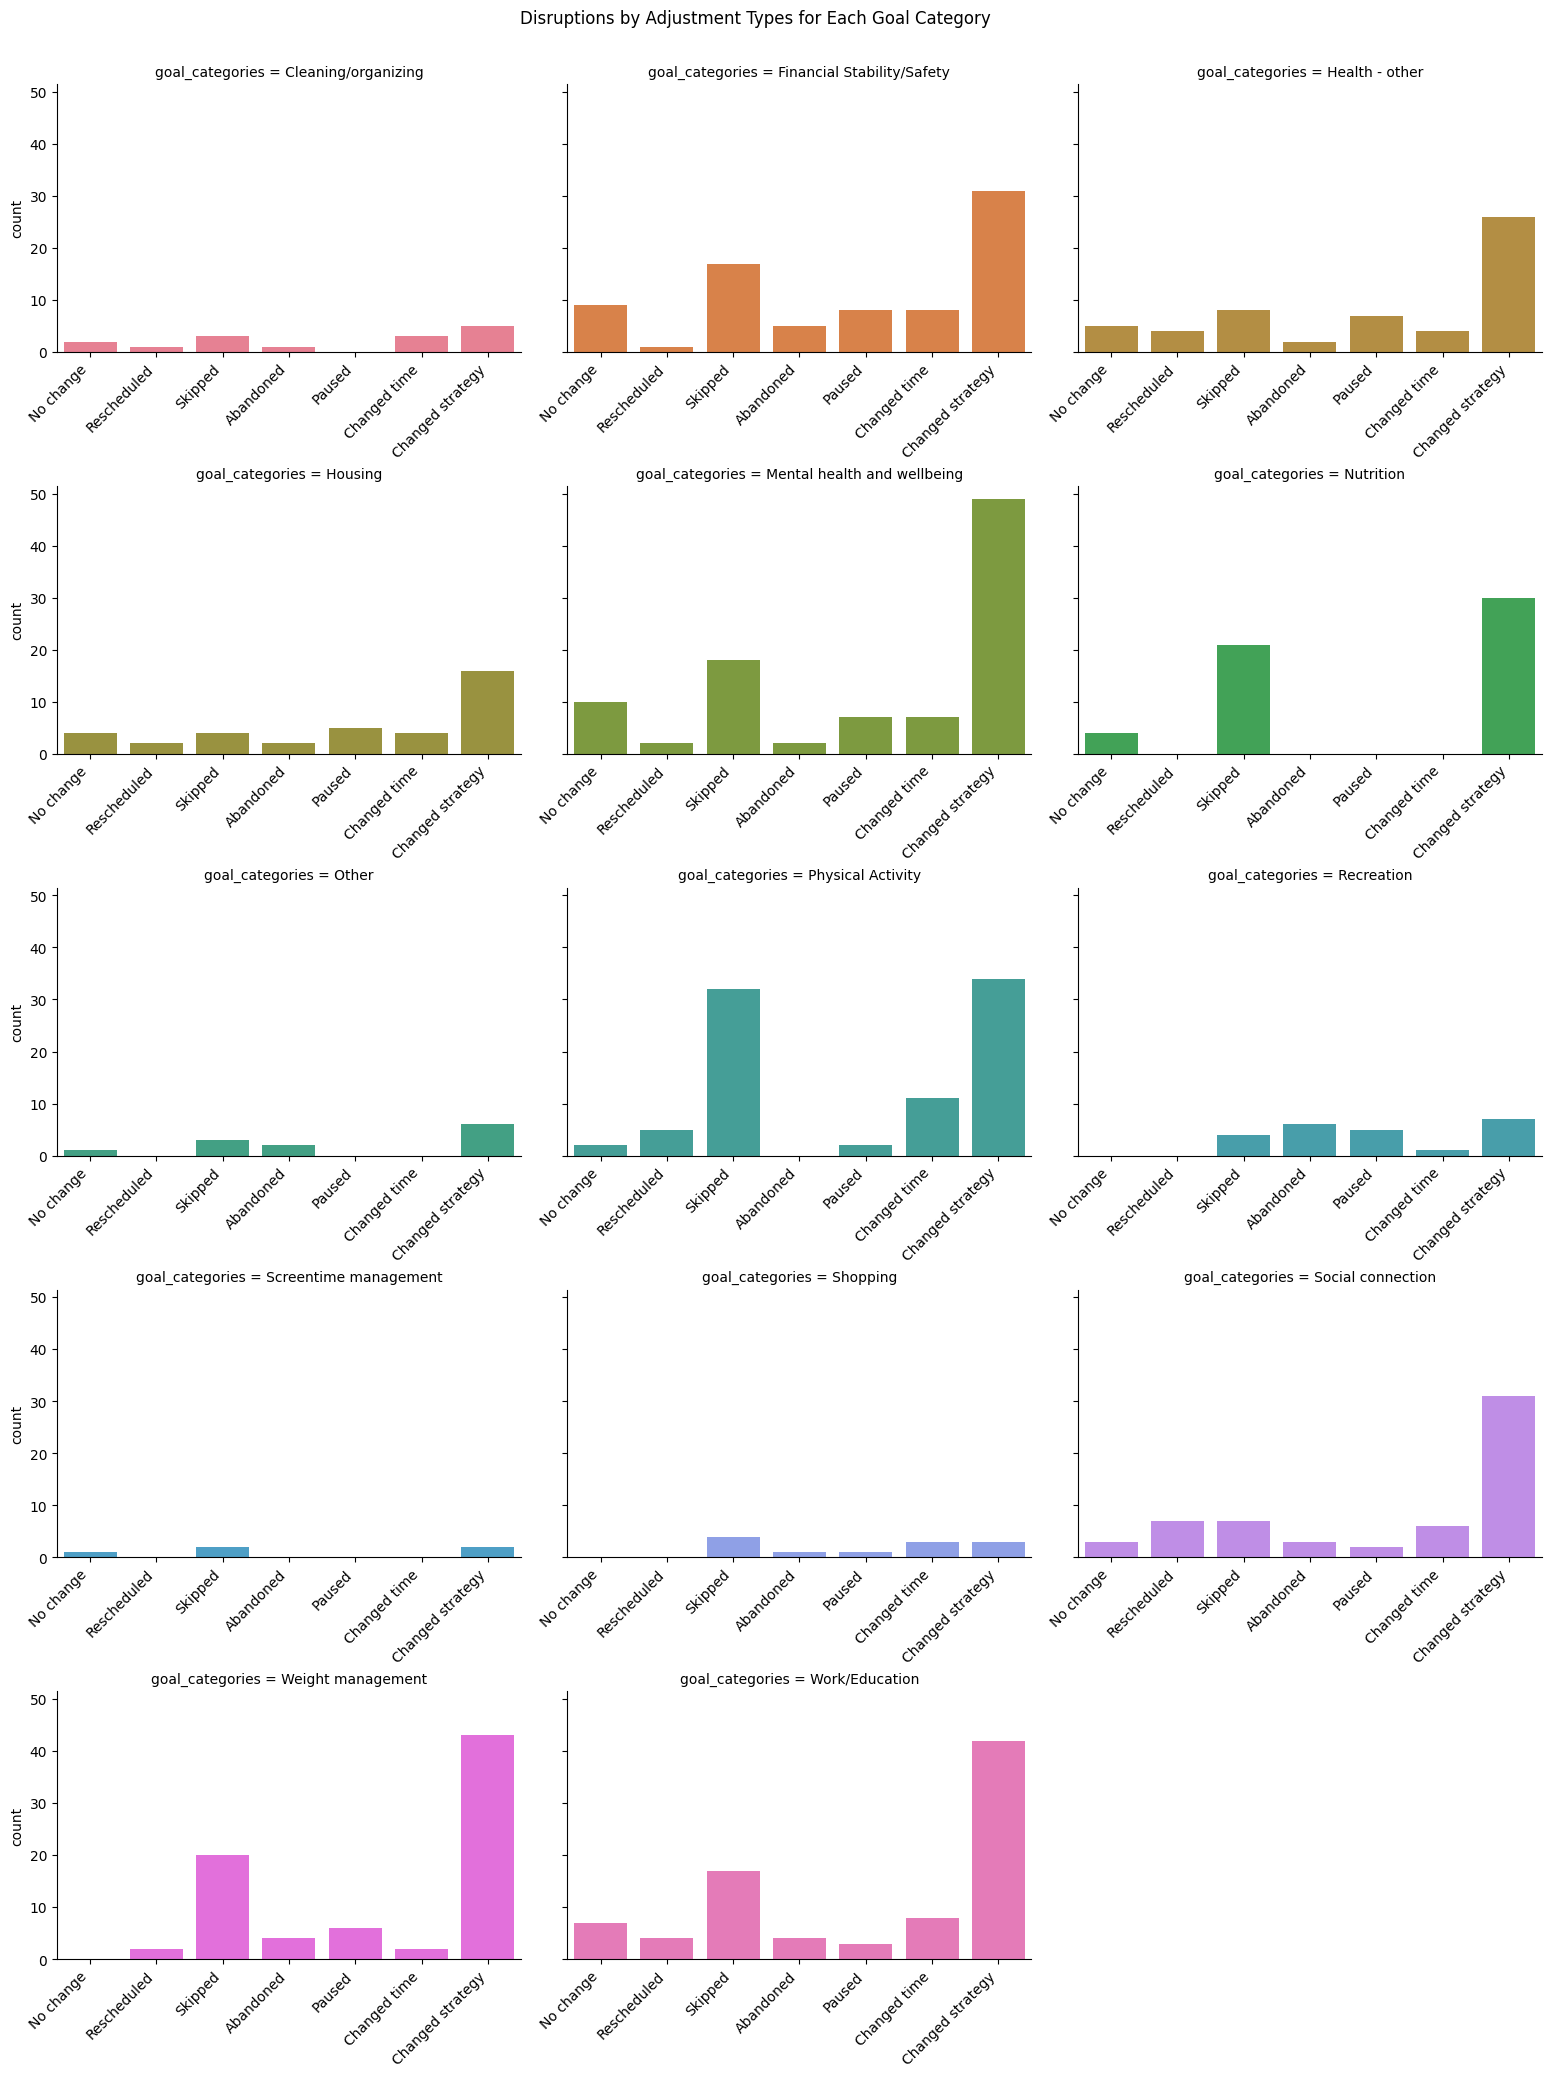

In [158]:
# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_changes_df = count_by_goal_changes.reset_index()

#rename
count_by_goal_changes_df.rename(columns={'pid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['No change', 'Rescheduled', 'Skipped','Abandoned','Paused', 'Changed time', 'Changed strategy']


count_by_goal_changes_df['goal_changes'] = pd.Categorical(count_by_goal_changes_df['goal_changes'], categories=xlabels_order, ordered=True)


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='goal_changes', y='count', hue='goal_categories', data=count_by_goal_changes_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Adjustment Types for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

## number of disruptions by type of burden created for each goal category

In [159]:
pp_disruptions_burden_goaltype = df[['pid', 'goal_categories','disruption_labor_aggregated', 'disruption_status']]
#filter out no disruptions
pp_disruptions_burden_goaltype = pp_disruptions_burden_goaltype[pp_disruptions_burden_goaltype['disruption_status'] == 'Disruption']

# explode this column to ensure each disruption labor type is in a single row

pp_survey_data_exploded = pp_disruptions_burden_goaltype.assign(disruption_labor_split=pp_disruptions_burden_goaltype['disruption_labor_aggregated'].str.split(', ')).explode('disruption_labor_split')


# Filter out 'No response', 'No labor- positive disruption', 'Other' before unstacking
pp_survey_data_exploded = pp_survey_data_exploded[~pp_survey_data_exploded['disruption_labor_split'].isin(['No response','No labor- positive disruption','Other'])]

#grouping [chronic and sleep] and [work and education]
pp_survey_data_exploded['goal_categories'] = pp_survey_data_exploded['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})

pp_survey_data_exploded = pp_survey_data_exploded[['pid', 'disruption_labor_split', 'goal_categories']]

# Group by goal_categories and frequency and count the number of values
count_by_goal_burden = pp_survey_data_exploded.groupby(['goal_categories', 'disruption_labor_split'])['pid'].count()

print(count_by_goal_burden.to_string()) # Use .to_string() to display all rows of the DataFrame

goal_categories              disruption_labor_split
Cleaning/organizing          Emotional                  7
                             Logistical                 1
                             Physical                   5
Financial Stability/Safety   Emotional                 59
                             Financial                 31
                             Logistical                24
                             Physical                   7
Health - other               Emotional                 37
                             Financial                  3
                             Logistical                12
                             Physical                  12
Housing                      Emotional                 23
                             Financial                 10
                             Logistical                 4
                             Physical                   1
Mental health and wellbeing  Emotional                 85
                    

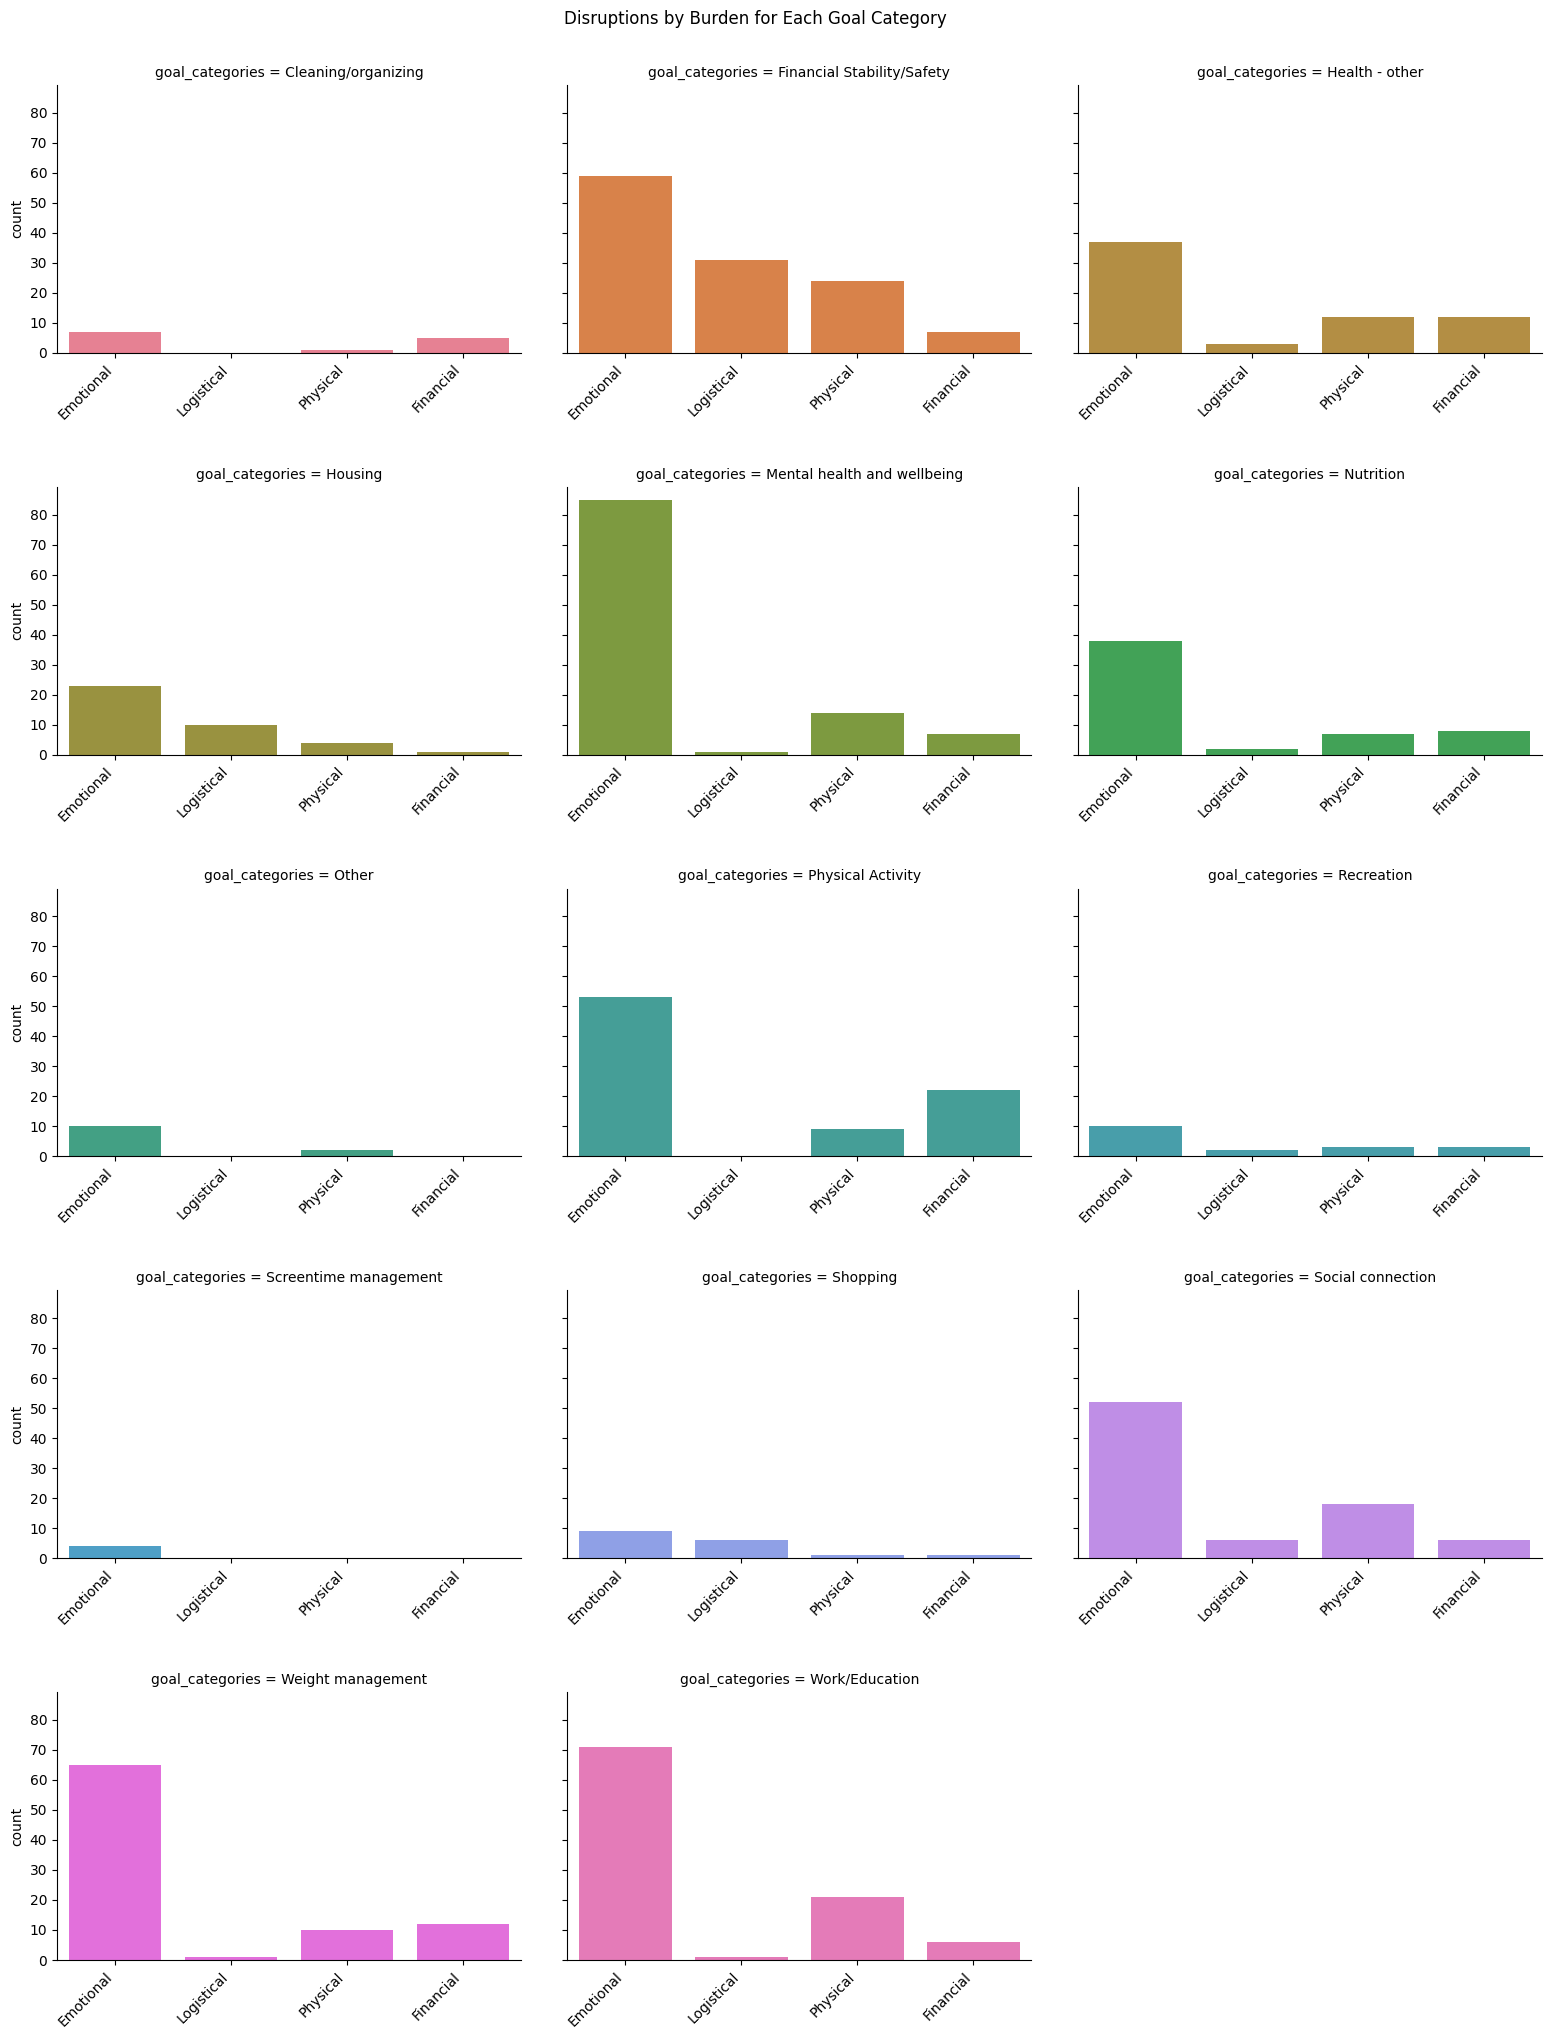

In [160]:
# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_burden_df = count_by_goal_burden.reset_index()

#rename
count_by_goal_burden_df.rename(columns={'pid': 'count'}, inplace=True)


count_by_goal_burden_df['disruption_labor_split'] = pd.Categorical(count_by_goal_burden_df['disruption_labor_split'])

# get label and set order
xlabels_order = ['Emotional', 'Logistical', 'Physical','Financial']


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='disruption_labor_split', y='count', hue='goal_categories', data=count_by_goal_burden_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Burden for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order,rotation=45, ha='right')

plt.show()